# <font color="#BFF506">**ABOUT THE DATASET (SOBRE EL CONJUNTO DE DATOS)**</font>

## <font color="#0AF506">*Content (Contenido)*</font>

- RowNumber:corresponds to the record (row) number and has no effect on the output.
- Número de fila: se corresponde con el número de registro de la tabla (fila) y no tiene efecto para la salida.  
-----------------------------
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Id de cliente: contiene valores aleatorios y no tiene efecto en que los clientes dejen o no el banco
-----------------------------
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- Apellido: es el apellido de un cliente y no tiene impacto en la decisión de dejar el banco.
----------------------------
- CreditScore: It can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Evaluación de crédito: puede tener efecto en la decisión de un cliente en dejar el banco ya que un cliente con una puntuación de crédito alta es menos probable que deje el banco.
----------------------------
- Geography: a customer’s location can affect their decision to leave the bank.
- Geografia: la locaclización de un cliente puede tener efecto en la decisión de dejar el banco.
----------------------------
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Sexo: es interesante explorar si el sexo tiene efecto o no en la decisión de un cliente de dejar el banco o no.
-----------------------------
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Edad: esto es ciertamente relevante ya que los clientes más ancianos son menos propensos a dejar sus bancos que los jóvenes.
------------------------------
- Tenure: refers to the number of years that the customer has been client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Permanencia: se refiere al número de años que un cliente ha sido cliente. Normalemente los clientes más antiguos son más leales y menos propensos a dejar el banco.
-------------------------------
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- Balance: También es un buen indicador del abandono de un cliente ya que las personas con un balance de cuenta más alto son menos propensas ha dejar el banco comparado con aquellos que tienen balances más bajos.
-------------------------------
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- Número de productos: se refiere al número de productos que un cliente ha cooprado a través de su banco.
-------------------------------
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- Tiene tarjeta de crédito: Dice si un cliente tiene una tarjeta de crédito o no. Esta columna es también relevante ya que las personas con tarjeta de crédito son menos propensas ha dejar el banco.
-------------------------------
- IsActiveMember: active customers are less likely to leave the bank.
- Es miembro activo: los clientes activos son menos propensos a dejar el banco
-------------------------------
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Salario estimado: como con el balance, la gente con salarios más bajos son más propensos a dejar el banco comparados con aquellos que tienen salarios más altos.
--------------------------------
- Exited: whether or not the customer left the bank. Meaning churn 1 (positive ones) and 0 (negative ones) not churn.
- Salieron:  Si los clientes dejaron o no el banco. Un 1 significa positivo y un cero negativo, o que no dejaron el banco.


As we know, it is much more expensive to sign in a new client than keeping an existing one so it is advantageous for banks to know what leads a client towards the decision to leave the company.
Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

Como todos sabemos, es mucho más caro para un banco conseguir un cliente nuevo que mantner los que ya tiene, por lo tanto es una ventaja para ellos saber que desencadena a estos clientes la decisión de deajr el banco.
La prevención de las salidas de clientes permite a las compañías desarrollar programas de fidelización y campañas de retención que les permita mantener a tantos clientes como sea posible.

Source: [Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers)

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from pathlib import Path
import numpy as np
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from general_purpose import seleccion_variables, new_classification_report, cross_validation_report, \
                            Binary_classification_assessment, my_rocAuc, crossval_models
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import precision_recall_curve

First of all we load our dataset:

Antes de nada cargamos nuestro conjunto de datos:

In [180]:
df = pd.read_csv(Path("churn.csv"))
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

As we saw before the first three variables are useless so we are going to get rid of them:

Como vimos anteriormente las tres primeras variables no tienen utilidad por lo que vamos a deshacernos de ellas:

In [181]:
drop = ["RowNumber","CustomerId","Surname"]
df = df.drop(columns=drop)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [182]:
df.tail()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0

Now we take a look at the describe so we can figure out how the variables are described in general:

Ahora miramos el describe para tener una idea de las características de nuestras variables en general:

In [183]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [184]:
df.select_dtypes(include="object").describe()

Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457

In [185]:
df.IsActiveMember.unique()

array([1, 0])

In [186]:
mas41 = df.loc[df.Age>41,"Age"].count()
menos41 = df.loc[df.Age<=41,"Age"].count()
print(f"tenemos {mas41} personas con más de 41 años y {menos41} personas con menos de 41 años")

tenemos 3215 personas con más de 41 años y 6785 personas con menos de 41 años


we can see there is no missing values in any variable and the following:

1. The Credit Score has low deviation from the mean score(650), which taking into account the maximum score of the dataset (850), it is mostly a high score, so our clients has a good score in general .

2. The average Age of our clients is almost 39 years old, but here we have more deviation as in the previous variable so the median differs from the mean in 2 years. This is due to the fact that there are more people in the young extreme than people in the elder so this people is pulling the mean to the left of the distribution and making the 2 years of difference between the mean and the median.

3. The average tenure is 5 years, very close to the median, being most of our clients below 7 years

4. The average balance is 76.485 euros with a standard deviation of 62.397 which is high, so we have a very diverse kind of clients regarding to the balance. The median and the mean separate one to each other more than the variables seen until now, and the data range is wider with a minimum balance of 0 euros and a maximum of 250898 euros. In addition we can see in the next chart that we have a very big amount of clientes with balances near to zero.

5. The median number of products is 1, the 75% of clients have 2 products and the maximum is 4.

6. Credit Card: We appreciate that these clients like this product as they have an average of 0.7 credit cards. This data by itself would say nothing if we don't take into account that it should be interpreted as, "the 70% of clients have a credit card", because is a binary variable of ones and zeros. The median is one and the maximum is also one.

7. The variable active member is a boolean variable so the information provided by the describe is not very helpful at this moment. However we can say that as the mean is greater than 0.5, the average client is more likely to be active than not active because there should be more ones than zeros.

8. The average salary of our clients is around 100.000 euros with a very close median to it. The standard deviation is of 57.510 euros and 75% of the these clients are below a salary of 149388 euros. Here we can see we have a very big outliers with a minimum salary of 11.58 euros that is affecting the standard deviation. We can also observe that, in general, above the 50% quantile people have a similar salary as their balance, being the balance greater than the salary. Also, just below of the 50% quantile the balance is lower than the salary. Seen this, we can suppose that people with an average salary or less struggle to save and above this quantile people can save money easier.

9. As with the active member variable, our target exited is boolean and we have more people that did not leave the bank than people that left.

In the two categorical variables that we have we can appreciate that France is the most frecuent country among the three different countries in the dataset, more than 50% of people are french. Could this bank be a French one?, probably. In the other variable we can see that the majority of clients are male, being this the 54,57% of them.




<br>
<br>

Podemos ver que no tenemos missing y lo siguiente:

1. La puntuación de crédtio tiene una baja desviación respecto a la media, siendo esta de 650 puntos que, teniendo en cuenta el máximo de la variable es 850, es una puntuación notable (650/850=0.765) y por lo tanto nuestros clientes tienen en general una buena puntuación crediticia. Podemos ver también, reforzando la idea anterior, que la mediana, 652, está muy cercana a la media.

2.  La edad media de nuestros clientes es casi 39 años, pero aquí tenemos más desviación que en la variable anterior por lo que la mediana difiere de la media en 2 años. Esto es debido a que existe más número de personas muy jóvenes que personas muy mayores y por tanto están tirando de la media hacia la parte izquierda de la distribución de la variable haciendo que se diferencie la media de la mediana en 2 años.

3. La permanencia media son 5 años, dato muy cercano a la mediana, estando la mayoría de nuestros clientes por debajo de 7 años.

4. El balance medio es de 76.485 eruos con una desviación estandar respecto a la media de 62.397 euros, lo que es alto. Esto quiere decir que tenemos clientes muy diversos en relación a esta variable. La mediana y la media se separan la una de la otra más que en variables vistas anteriormente y el rango de de los datos es mayor, con un mínimo de 0 euros y un maximo de 250.898. Además existen una gran cantidad de clientes con balances cercanos al cero

5. Para el número de productos tenemos que la mediana es 1 y el 75% de los clientes se acumulan hasta un máximo de 2 productos, siendo el máximo 4.

6. Tarjeta de Crédito: apreciamos que a los clientes les gusta tener tarjeta de crédito ya que el 70% de los clientes tiene al menos una, se trata de una variable binaria de 1 o 0. La mediana es uno y el máximo es también uno.

7. La variable miembro activo es una variable booleana y por tanto la información que nos proporciona el describe no es de mucha ayuda en estos momentos. Sin embargo, podemos decir que, como la media es mayor que 0.5, el cliente medio es más proclive a ser activo que no activo debido a que debe haber más unos que ceros.

8. El salario medio de nuestros clientes está alrededor de 100.000 euros con una mediana muy cercana a ella. La desviación estándar es de 57.510 euros y el 75% de los clientes están por debajo del salario de 149.388 euros. Aquí podemos ver que tenemos grandes datos extremos puesto que nos encontramos con un salario mínimo de 11.58 euros, que está afectando a la desviación típica. También podemos observar que, en general, por encima del cuartil 50 la gente tiene un salario similar a su balance, siendo el balance superior que el salario. También, justo por debajo del cuartil 50, el balance es menor que el salario. Viendo esto, podemos suponer que la gente con un salario medio o menor tiene dificultades para ahorrar y sobre el cuartil 50 la gente ahorra con mayor facilidad.

9. Como con la variable miembro activo, nuestra variable objetivo, Exited, es booleana y tenemos más personas que no han dejado el banco que personas que sí lo han dejado.

En las dos variables categóricas que tenemos podemos aprecias que Francia es el país más frecuento entre los tres que existen en el conjunto de datos, más del 50% de las personas son francesas. ¿Podría ser este un banco Francés?, quizás.
En la otra variable, podemos ver que la mayoría de los clientes son hombres, siendo estos el 54,57 por ciento.

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [188]:
for i in ["HasCrCard","IsActiveMember","Exited"]:
    df[i] = df[i].astype(dtype="bool")

We see the variable types are not all correct so we parse HasCrCard, IsActiveMember and Exited as boolean (vemos que los tipos de variable no son todos correctos). Por lo que modificamos las variables HasCrCard, IsActiveMember y Exited convirtiendolas en booleanas.
# UNIVARIATE ANALYSIS (ANÁLISIS UNIVARIANTE)

1. HISTOGRAMS AND BOXPLOTS - HISTOGRAMAS, BOXPLOT
2. CENTRAL STATISTICS - ESTADÍSTICOS DE CENTRALIDAD
3. VARIABLE STATISTICS - ESTADÍSTICOS DE DISPERSIÓN

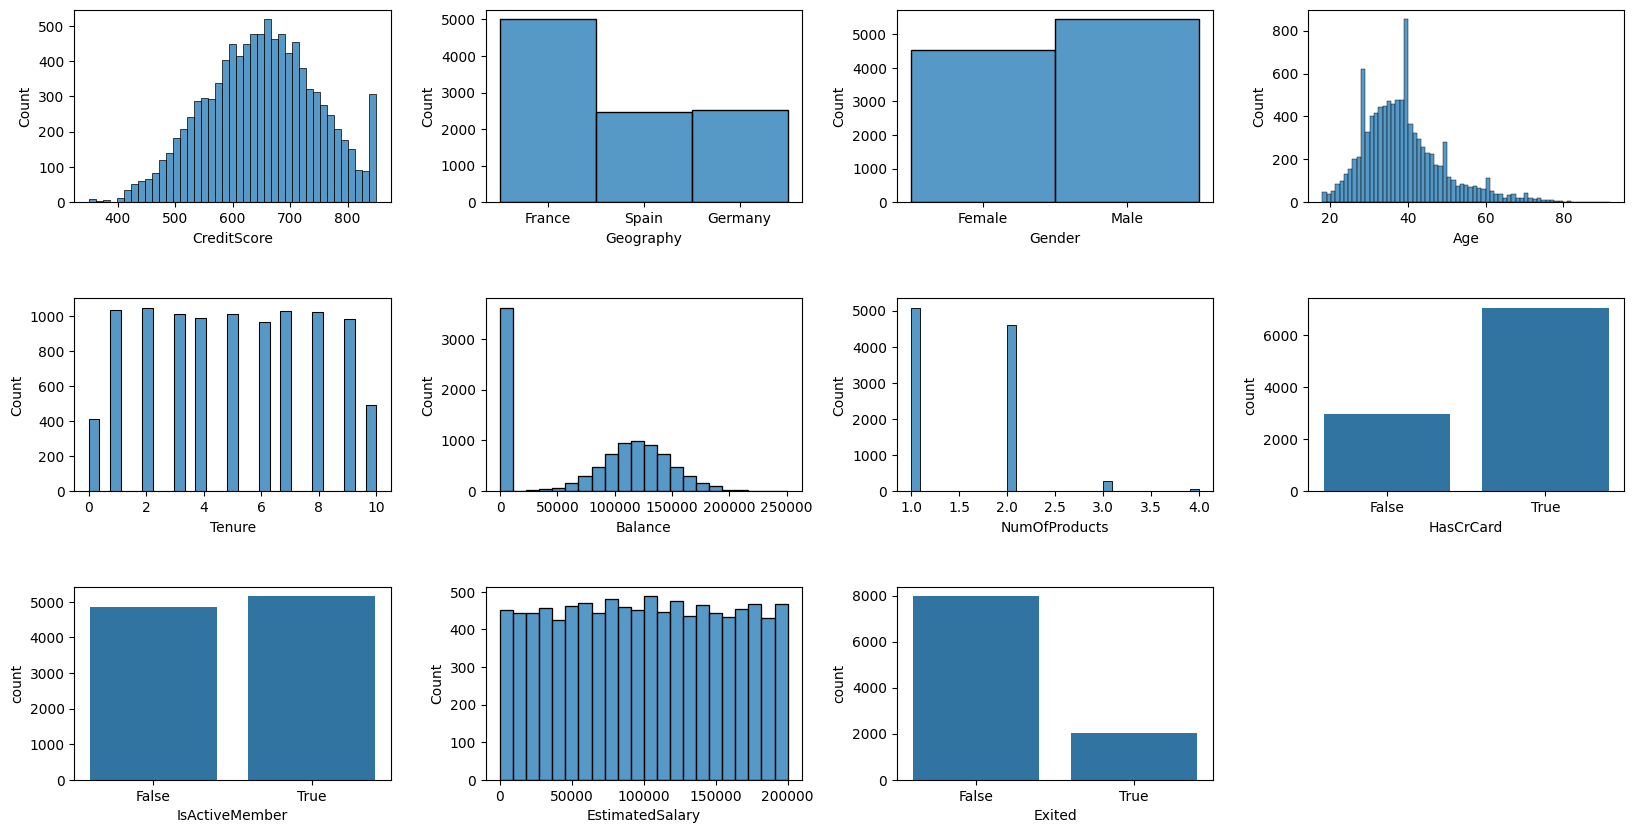

In [189]:
figure = plt.figure(figsize=(20,10))
figure.subplots_adjust(wspace=0.3,hspace=0.5)

variables = df.columns

for i in range(len(variables)):
    figure.add_subplot(3,4,i+1)
    pos =variables[i]

    if df[variables[i]].dtype != "bool":
        sns.histplot(data=df,x=pos)
    else:
        sns.countplot(data=df,x=pos)

In [190]:


variables = df.columns

df.EstimatedSalary.dtype

dtype('float64')

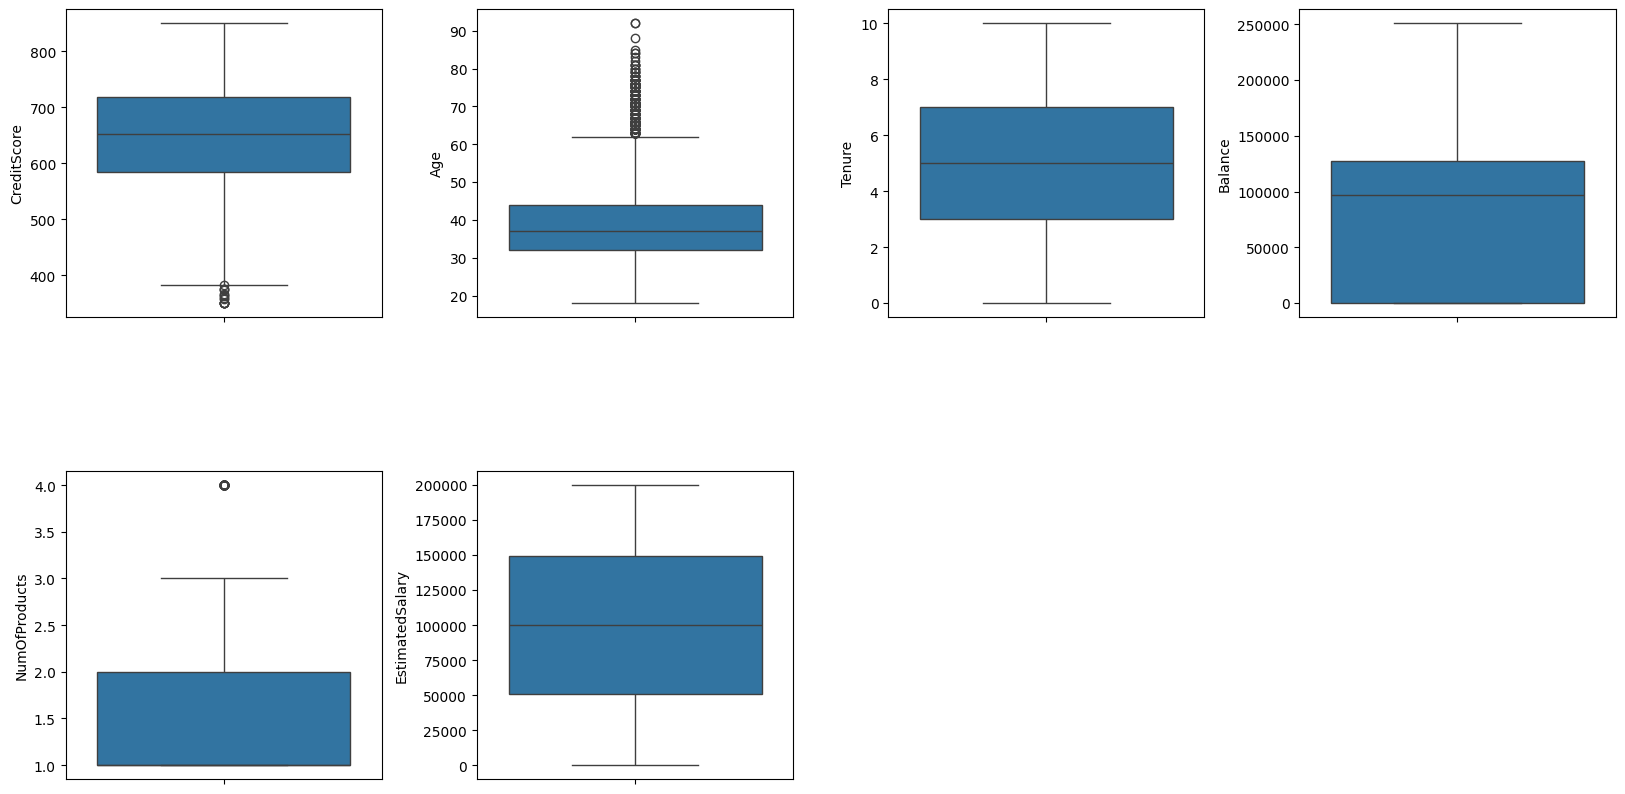

In [191]:
figure = plt.figure(figsize=(20,10))
figure.subplots_adjust(wspace=0.3,hspace=0.5)

df_num = df.select_dtypes(exclude="object")
variables2 = [i for i in df_num.columns if i not in ["HasCrCard","IsActiveMember","Exited"]]

for i in range(len(variables2)):
    pos =variables2[i]
    figure.add_subplot(2,4,i+1)
    sns.boxplot(data=df_num,y=pos)

Vemos que tenemos algunos outliers en las variables Credit Score, Age and NumOfProducts. Para tratarlos decidimos lo siguiente:

- CreditScore: decidimos tratarlos con el test de Tukey mediante el cual todos aquellos valores que estén por debajo de 1.5 veces el primer cuartil de la distribución o estén 1.5 veces por encima del tercer cuartil de la misma serán eliminados.

- Age: Consideramos que sería un error eliminar a los clientes de edades avanzadas dado que son una población importante de los bancos con grandes recursos y son parte fundamental del estudio no distorsionando las métricas

- NumOfProducts: vamos a aplicar el mismo criterio que en credit score dado que los clientes con un número elevado de productos en este dataset consideramos que distorsiona los estadísticos.
<br>
<br>

We have seen that there are some outliers on the credit score, age and NumOfProducts. For treat them we have decided the following:

- CreditScore: we are going to treat them applying the Tukey test so all the data points below 1.5 times the first quantil or those 1.5 times above the third quantil will be removed.

- Age: we consider it would be an error to remove elder clients as they are an important cluster fo banks because they usually have big balances and they are a fundamental part of this study, who are not disturbing the metrics.

- NumOfProducts: we are applying the same criteria as in CreditScore because clients with high number of products are not usual and disturb the metrics.


In [192]:
def tukey_outliers(data,extreme=False,cols="all",graph="yes",graph_type="seaborn"):


    data = data.select_dtypes(include = ['float64', 'int64'])

    if cols == "all":
        columnas = data.columns
    else:
        columnas = cols

    central_tendency = pd.DataFrame()

    for i in range(0,len(columnas)):

        q1, q3 = np.percentile(data[columnas[i]],[25,75])
        iqr = q3 - q1
        constant = 1.5 if not extreme else 3
        df_out = data[~((data[columnas[i]]>(q3+constant*iqr)) | (data[columnas[i]]<(q1-constant*iqr)))]

        pos = columnas[i]

        media = data[pos].mean()
        median = data[pos].median()
        moda = data[pos].mode()[0]
        std = data[pos].std()
        iqr = data[pos].max() - data[pos].min()

        media_out = df_out[pos].mean()
        median_out = df_out[pos].median()
        moda_out = df_out[pos].mode()[0]
        std_out = df_out[pos].std()
        iqr_out = df_out[pos].max() - df_out[pos].min()

        central_tendency[pos] = pd.Series(data=[media,median,moda,std,iqr]).round(2)
        central_tendency[pos+"_out"] = pd.Series(data=[media_out,median_out,moda_out,std_out,iqr_out],name=pos+"_out").round(2)

        if graph=="yes" and graph_type=="seaborn":

            fig= plt.figure(figsize=(15,3))
            fig.subplots_adjust(hspace=0.3, wspace=0.3)

            ax = fig.add_subplot(1, 2,1)
            sns.boxplot(x=pos, data=data,color='#004571')
            plt.title('Con Outliers')

            ax = fig.add_subplot(1, 2,2)
            sns.boxplot(x=pos, data=df_out,color='#E57200')
            plt.title('Sin Outliers')

    central_tendency.index = ["mean","median","mode","std","iqr"]

    if graph == "yes" and graph_type=="plotly":

        fig = make_subplots(rows=2,cols=len(columnas),subplot_titles=[name for name in columnas])

        for i in range(len(columnas)):

            fig.add_trace(go.Box(x=data[columnas[i]],name="original"),1,i+1)
            fig.add_trace(go.Box(x=df_out[columnas[i]],name="treated"),2,i+1)
            fig.update_layout(showlegend=False)
        fig.show()

    fig2 = ff.create_table(table_text=central_tendency,index=True)
    fig2.show()

    idx = [id for id in data.index if id not in df_out.index]

    return df_out,central_tendency,idx

In [193]:
newdf,ct,idx = tukey_outliers(df,cols=["CreditScore","NumOfProducts"],graph_type="plotly")

Después de haber tratado nuestro dataframe para eliminar el efecto de los outliers, podemos ver que el efecto ha sido insignificante teniendo en cuenta los principales estadísticos descriptivos de nuestras variables.

Radiografía del cliente:  

Vemos que el credit score se escora un poco hacia valores altos pero no demasiado, estando la mayoria de los clientes entorno a 700 puntos, siendo el mínimo 0 y el máximo 850, por lo tanto podemos establecer que la mayoría de los clientes tienen un buen scoring.  
La mayoría de las personas tiene menos de 40 años, y en este caso la distribución está más escorada hacia valores menores a la media.  
Como veíamos al principio la mayoría de los clientes tiene tarjeta de crédito, poseen 1 o 2 productos y su salario estimado está bastante equitativamente repartido. Donde se ven más diferencias es en el balance de dinero ahorrado donde se ven clientes con poco dinero ahorrado y clientes con una cantidad considerable ahorrada. Por último, la mayoría de los clientes no han dejado el banco, permanecen en él, son Franceses y de sexo masculino.

After treat outliers we can see there has been an irrelevant effect on the main descriptive statistics.

Client radiography:

The clients' credit score tends to higher values but not much, being the majority of them aroun 700 points where the minimum is 0 and the maximum 850, because of this we can stablish that most of the clients have a good rating.
Most of the people is under 40 years old and the disbribution is right skewed because we have a considerable amount of values lower than the mean.
As we saw before the majority of clients has credit card and their salaries es fairly equitative distribuited. Where we can see bigger differences is in the balance variable because we can appreciate clients with few money saved and others with good savings. Lastly, the majority of clients has not left the bank, they stay, and they are male French people.

# Bivariate Analysis (Análisis Bivariante)

In [194]:
df = df.drop(index=idx)
df = df.reset_index(drop=True)


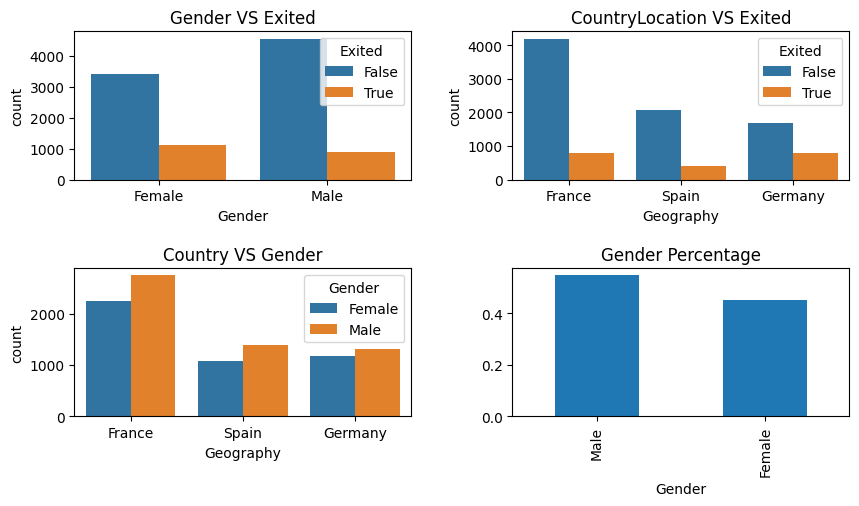

In [195]:
figure = plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3,hspace=0.6)
figure.add_subplot(2,2,1)
sns.countplot(data=df,x="Gender",hue="Exited")
plt.title("Gender VS Exited")
figure.add_subplot(2,2,2)
sns.countplot(data=df,x="Geography",hue="Exited")
plt.title("CountryLocation VS Exited")
figure.add_subplot(2,2,3)
sns.countplot(data=df,x="Geography",hue="Gender")
plt.title("Country VS Gender")
figure.add_subplot(2,2,4)
df.Gender.value_counts(normalize=True).plot(kind="bar")
plt.title("Gender Percentage")
plt.show()

En los gráficos de arriba podemos observar lo siguiente:

-  Los hombres que no han dejado el banco son más que las mujeres con diferencia, sin embargo aunque se han ido menos hombres que mujeres,  la proporción es parecida entre sexos.

- Los que más permanecen en el banco son los franceses, después los españoles y por último los alemanes. Por otra parte, los que más se van son los alemanes, luego los franceses y por último los españoles.

- Por países vemos que hay más hombres que mujeres en todas las nacionalidades representadas pero las diferencias son más acusadas si son Franceses o españoles.

<br>
<br>

In the charts above we can observe the following:

- There are more Men that remain in the bank than women, however althoug there are less men that have left the bank, the proportion between the two sexs is similar.

- The people that stay the most in the bank are french ones, then spanish people and last germans. By the other hand, the people that left more frequently are germans, then comes the french people and the last ones are the spaniards.

- By countries we see that there are more men than women across all nacionalities but the differencies are bigger between french and spanish people.


In [196]:
pd.crosstab(df.Geography,df.Exited,normalize=True,margins=True)

Exited        False      True       All
Geography                              
France     0.422938  0.078571  0.501509
Germany    0.170523  0.079477  0.250000
Spain      0.207646  0.040845  0.248491
All        0.801107  0.198893  1.000000

In [197]:
pd.crosstab(df.Gender,df.Exited,normalize=True,margins=True)

Exited     False      True       All
Gender                              
Female  0.342455  0.110765  0.453219
Male    0.458652  0.088129  0.546781
All     0.801107  0.198893  1.000000

Estas dos tablas nos muestran los mismos datos que los gráficos pero en porcentajes, de esta manera los franceses que dejaron el banco fueron el 8.1% y los que permanecieron en él el 42%. Este grupo representa en el conjunto de datos el 50.14%. Por otra parte, después de Francia viene Alemania si miramos cuantos dejaron el banco y luego va España. Además, si miramos las personas que permanecieron en el banco, Francia sigue en primer lugar, pero Alemania y España se intercambian las posiciones, quedando España segunda y Alelmania última.
<br>
<br>
These two tables show us the same data but using numbers, this way the french people that left the bank was 8.1% and did not leave 42%, in total France accounts for the 50.14% of the data. After France comes Germany in terms of leaving the bank and in last position Spain. However, these two last countries exchange positions when staying in the bank being Spain and after Germany.

In [198]:
df.loc[df["Gender"]=="Male","Balance"].median()

98014.74

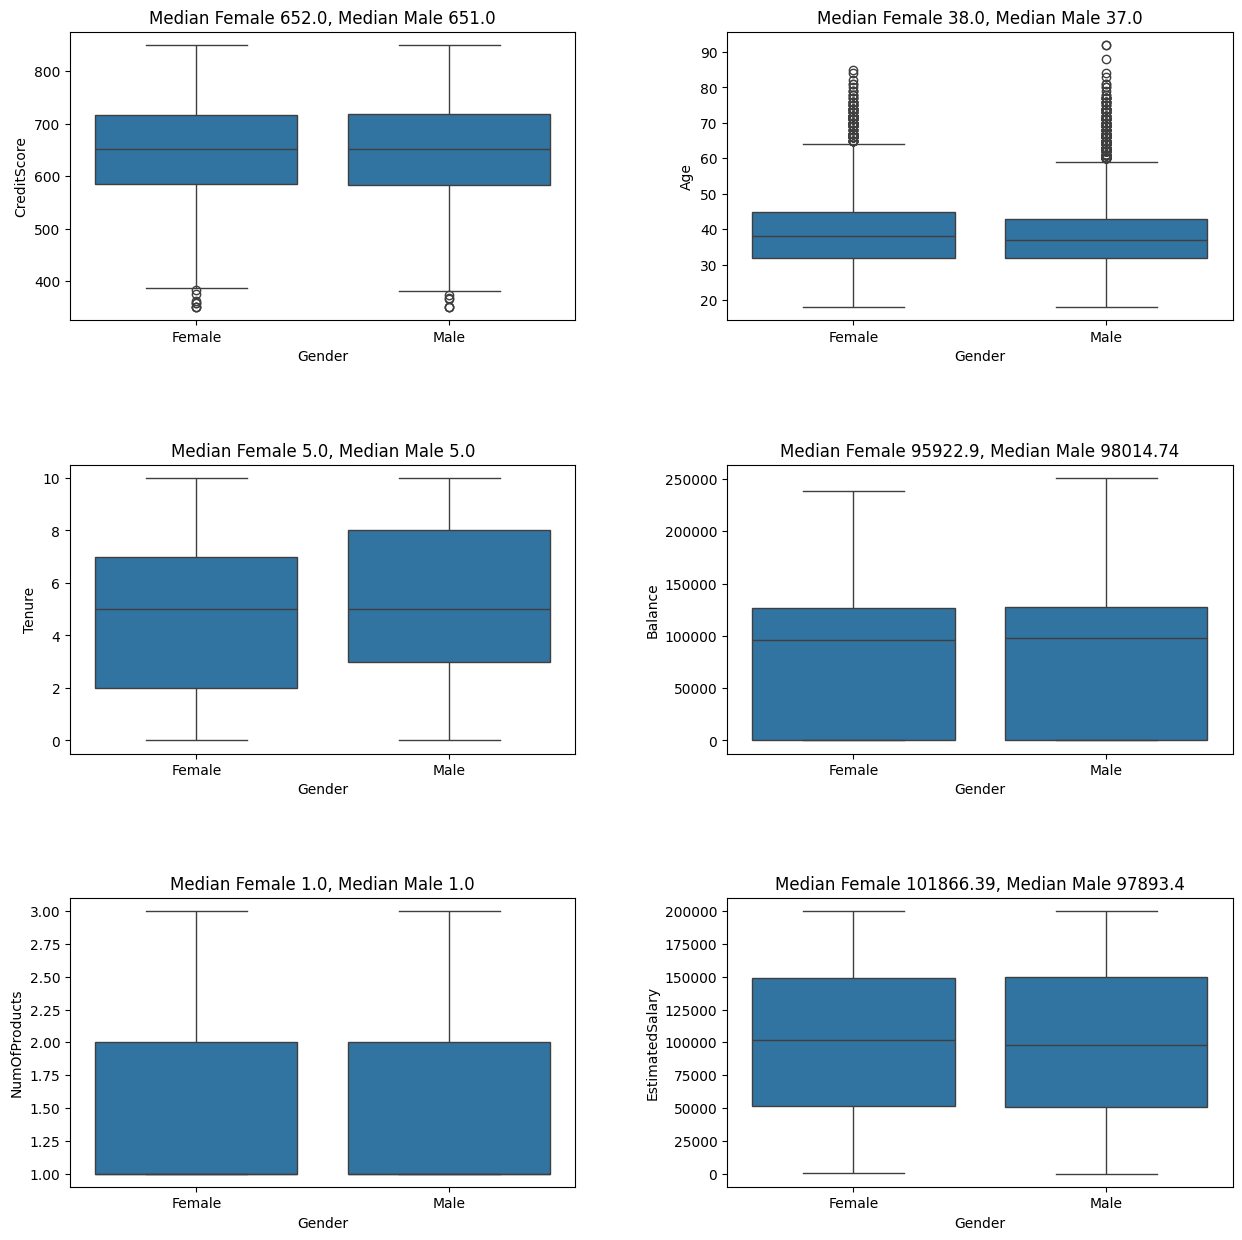

In [199]:
figure = plt.figure(figsize=(15,15))
figure.subplots_adjust(wspace=0.3,hspace=0.5)

new_vars = [var for var in variables if var not in ["HasCrCard","IsActiveMember","Gender","Exited","Geography"]]

for i in range(len(new_vars)):

    pos = new_vars[i]
    med_m = df.loc[df["Gender"]=="Male",new_vars[i]].median()
    med_f = df.loc[df["Gender"]=="Female",new_vars[i]].median()

    figure.add_subplot(3,2,i+1)
    sns.boxplot(data=df,y=pos,x="Gender")
    plt.title(f"Median Female {med_f}, Median Male {med_m}")

Si miramos los gráficos boxplot de las variables divididas por sexo podemos ver que no existen diferencias apreciables entre ellos. La mayor diferencia que podemos encontrar es en las variables Tenure y edad, en las cuales existe una mayor cantidad de hombres de edades avanzadas y el rango de edad de las mujeres es algo superior al de los hombres en el rango intercuartílico. Por otra parte, en la variable tenure podemos ver que aunque las medias son parecidas es por razones distintas. Así, los hombres por lo general llevan más tiempo en el banco que las mujeres, empezando el rango intercuartílico en tres años frente a dos de las mujeres, pero existen más mujeres con periodos superiores al tercer cuartil que hombres, que se acumulan más que las mujeres por debajo del primer cuartil.

In the boxplots dived by sex we can appreciate there are not relevant differencies between men and women. The greatest difference could be in Tenure and age as there are more older men and the age range for women is bigger inside the interquartil range. By other hand, in the tenure variable we can spot that althoug the means are similar, this is because of different causes. This way, men in general stay longer than women, starting the interquartil range in three years against two for women, nonetheless there are more women with superior tenure above the third quartil than men, who have greater numbers below the first quartil.

In [200]:
px.histogram(data_frame=df,x="Age",color=df.Exited.astype(str),template="plotly_dark",
             marginal="box",title="Exited vs Age")

vemos que por lo general las personas que dejan el banco tienen una edad mediana de 45 años y los que permanecen de 36. En este sentido, apreciamos que la concentración de las personas que suelen dejar el banco se da en mayor medida en el rango de edad de 38 a 51 años y para los que se quedan en edades de 31 a 41 años.
<br>
<br>
The median age of people that left the bank is 45 years old and the ones that stay is 36. This way, we can also see that people that churn the most are concentrated in the age range of 38 and 51 years old and for the loyal ones is 31-41.

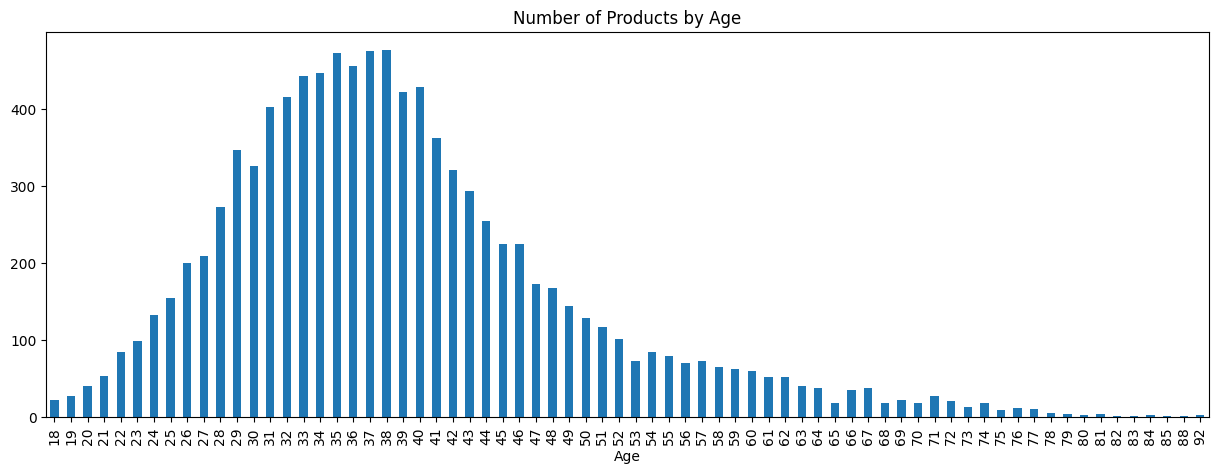

In [201]:
age_group_numpro = df.groupby(by="Age")["NumOfProducts"].count()
age_group_numpro.plot(kind="bar",figsize=(15,5),title="Number of Products by Age")
plt.show()

Como hemos visto el grueso de abandonos se produce entre 38 y 51 años, justo cuando las personas empiezan a decrecer en el número de productos contratados con el banco. Esto puede ser debido a que sus circunstancias personales pueden ir cambiado hacia esa edad en las que las cargas por hipotecas y préstamos van siendo menores y por tanto, al ser estos productos de alta vinculación con el banco,si se van cancelando, y por tanto va siendo menor la vinculación con la entidad, las personas empiezan a contratar los productos con compañías diferentes. Además, esta edad y la consecuente reducción de productos puede ser un indicador de churn para el banco.

As we have seen, the vast majority of churns come from people aged in a range of 38-51, just when they start to decrease the number of products contracted with the bank. This could be due to the changing personal circumstances as they get older and get relieved of mortgages or loans that are products with big retention of clients as they create a strong link. As they are no longer linked by this products, they begin to contract products with other companies reducing the linkage with the bank. So that, the age and the decrease in the number of products could be an indicator of churn.

In [202]:
px.histogram(data_frame=df,x="IsActiveMember",
             color=df.Exited.astype(str),
             template="plotly_dark",
             title="Active Member VS Churn")

En este gráfico podemos apreciar como  los clientes que son más activos permanecen mucho más que los que no lo son y abandonan menos.

In this chart we can see how more active clients stay more than non active ones.

In [203]:
px.histogram(data_frame=df,x="HasCrCard",color="Exited",
             template="plotly_dark",title="Credit Card Tenant Vs Exited")

En este gráfico podemos observar que las personas que tienen una tarjeta de crédito abandonan la entidad en mucha menos proporción que los que no la tienen. Sin embargo la cantidad de personas que tienen una tarjeta es mucho mayor a la de personas que no la tienen. De esta manera podemos ver que la proporción de personas que se quedan en el banco y tienen una tarjeta de crédito es mucho mayor a la proporción de personas que se quedan pero no la tienen. Podemos verlo en la tabla de contingencia más abajo:
<br>
<br>
In this chart we can observe that people who have a credit card churn much less than people that don't. However, it is also true that people who have a credit card is much bigger than people that don't. Anyways, the proportion of people that don`t churn is still bigger than the people that churn if we take a look at the relative data shown by the crosstab below:

In [204]:
hascrc_exit = pd.crosstab(df.HasCrCard,df.Exited,normalize=True,margins=True)
hascrc_exit

Exited        False      True       All
HasCrCard                              
False      0.234608  0.059759  0.294366
True       0.566499  0.139135  0.705634
All        0.801107  0.198893  1.000000

In [205]:
hascrc_balance = hascrc_exit[0]-hascrc_exit[1]
hascrc_balance

HasCrCard
False    0.174849
True     0.427364
All      0.602213
dtype: float64

En la tabla superior apreciamos que de aquellas personas que tienen tarjeta de crédito se fueron el 14,24% de ellas y por otra parte de aquellas que no tienen tarjeta de crédito se fueron el 6,13 por ciento. Por otra parte, de las personas que tienen tarjeta de crédito no se ha ido el 56,31 por ciento y de las que no la tienen no se ha ido el 23.34%. En resúmen podemos decir que el balance de las personas que se han quedado y las que se han ido es positivo ya que existen más personas que se quedan de las que se van y de estas personas que se quedan la mayoría tienen tarjeta de crédito, es decir existe una mayor proporción de personas que se quedan y tienen tarjeta de crédito que personas que se quedan y no la tienen. Para ser más exactos el 42.07% de las personas que tienen tarjeta de crédito se quedan en el banco y de aquellas personas que no la tienen solo se quedan el 17.19%, por lo que esta parece ser una variable importante.
<br>
<br>
<br>
In the table above we appreciate that of those people who have a credit card, 14.24% of them left and of those who do not have a credit card, 6.13% left. Also, of the people who have a credit card, 56.31 percent have not left and of those who do not have it, 23.34% have not left. In summary we can say that the balance of people who have stayed and those who have left is positive since there are more people who stay than those who leave and of these people who stay most have a credit card, that is, there is a higher proportion of people who stay and have a credit card than people who stay and do not have it. Being exact the 42.07% people that have credit card do not churn and those who do not own a credit card just stay the 17.19%, so this looks like to be an importante variable.

In [206]:
px.histogram(data_frame=df,x="HasCrCard",color="Gender",template="plotly_dark",
             title="Gender Vs Credit Card Tenants")

En este gráfico vemos que tanto de los que tienen como de los clientes que no tienen tarjeta de crédito, la mayoría son hombres pero ambos sexos están cercanos los unos de los otros en las proporciones de churn y no churn. La tenencia sigue siendo la nota dominante.

In this graph we see that both of those who have and don't have a credit card, most are men, but both sexes are close to each other in terms of churn. Tenure remains the dominant note.

In [207]:
px.histogram(data_frame=df,x="EstimatedSalary",color="Gender",marginal="box")


Podemos apreciar que la distribución de los salarios para hombres y mujeres es muy parecida siendo el dato más resaltable que existen más hombres que mujeres para cada uno de los intervalos de salario. Además en el boxplot podemos ver que la mediana de salario son muy parecidas, siendo mayor el de las mujeres pero siendo el rango intercuartílico de los hombres  algo más amplio.
<br>
<br>
<br>
We can see that the distribution of wages for men and women is very similar, the most noteworthy fact being that there are more men than women for each of the salary intervals. Also in the boxplot we can see that the median salary are very similar, being higher that of women but being the interquartile range of men somewhat wider.

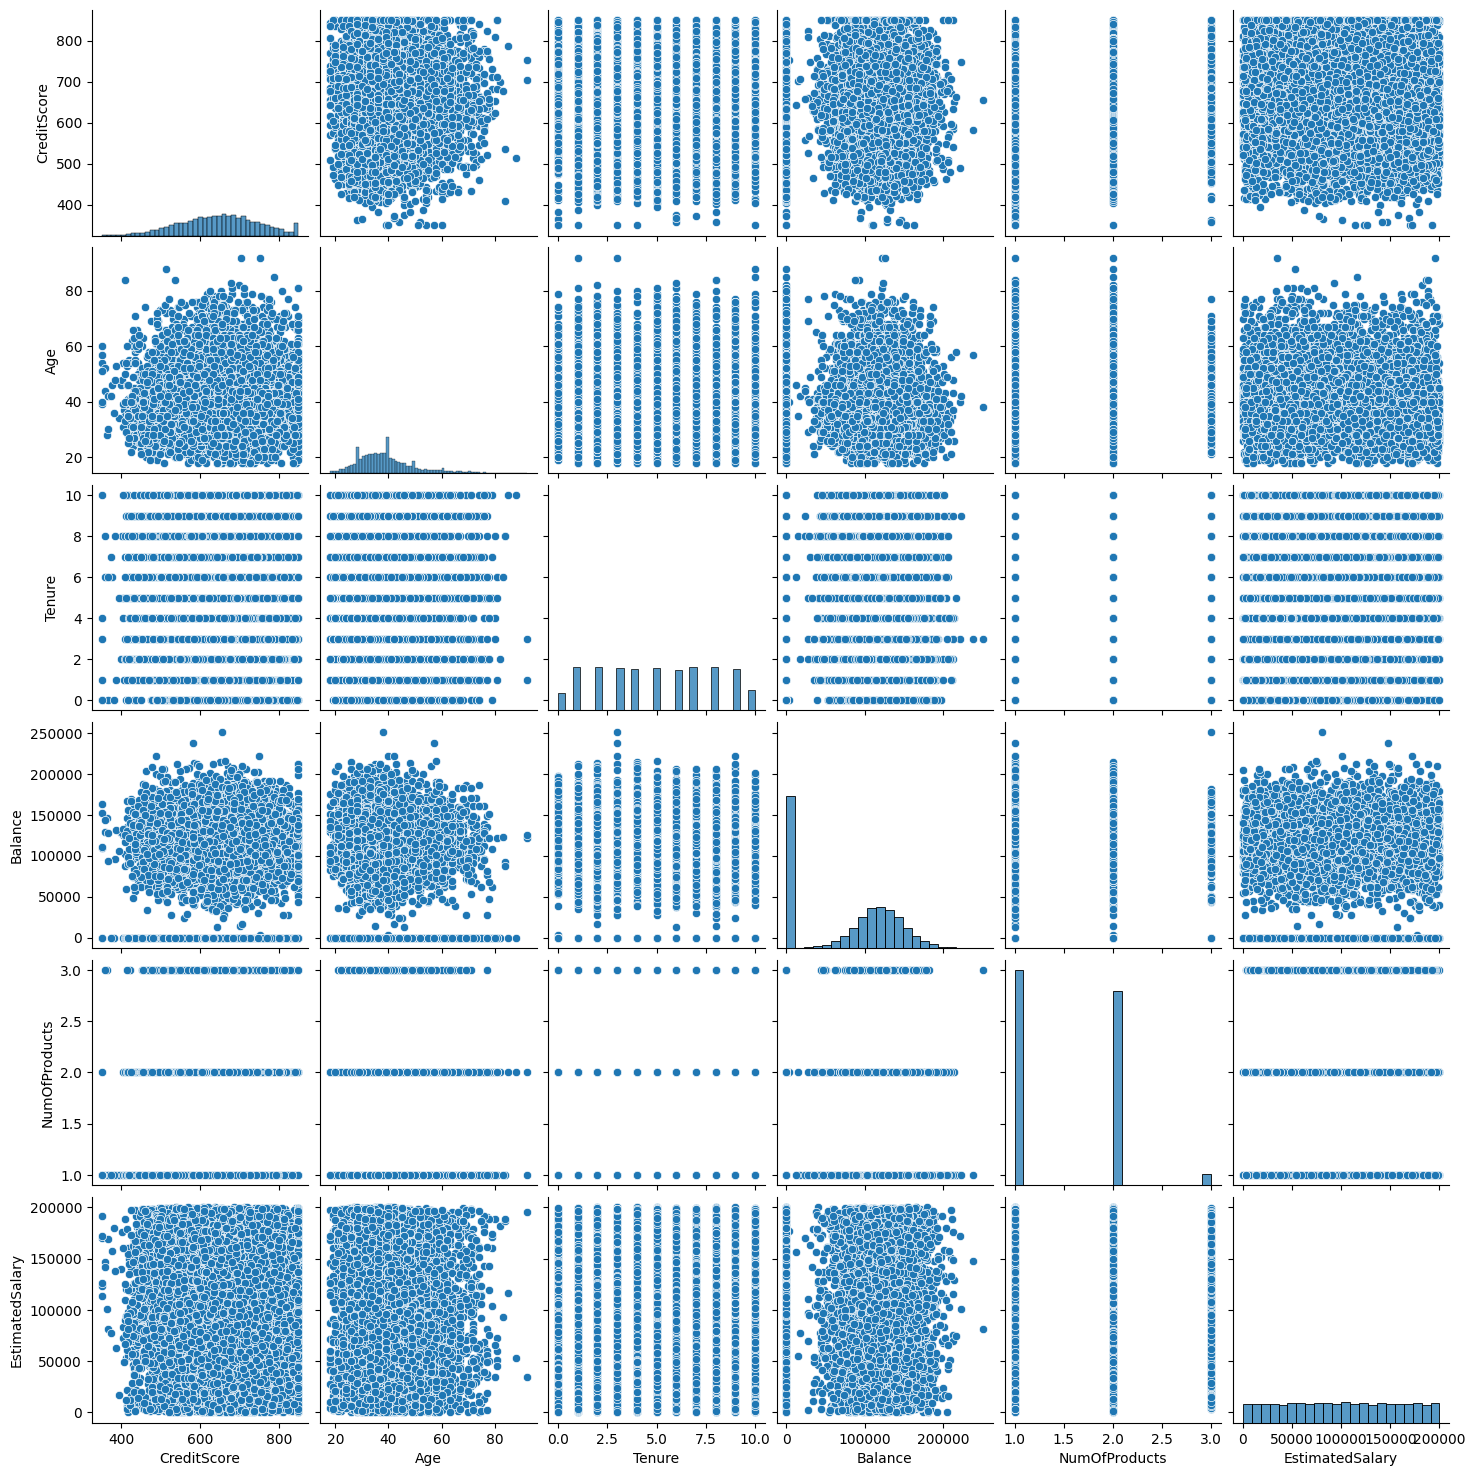

In [208]:
sns.pairplot(df.select_dtypes(exclude="bool"));

In the scatterplots we can appreciate that it doesn't exist or is very weak the correlation between variables

En nuestros scatterplots podemos apreciar que no existe o es súmamente débil la correlación entre las variables

In [209]:
px.histogram(data_frame=df,x="CreditScore",color="Exited",marginal="box")

In [210]:
px.histogram(data_frame=df,x="Balance",color="Exited",marginal="box")

In [211]:
px.histogram(data_frame=df,x="EstimatedSalary",color="Exited",marginal="box")

In [212]:
px.scatter(data_frame=df,x="Balance",y="CreditScore",color="Exited",size="EstimatedSalary")

In [213]:
px.scatter(data_frame=df,x="EstimatedSalary",y="CreditScore",color="Exited",size="Balance")

We do not observe differences in the data distribution based on whether clients have left the bank or not. However, what we see is that we have a large number of clients with balances close to 0 and high credit scoring, which, when related to estimated salaries, suggests that most of them have substantial incomes. This could be a contributing factor to their high credit scores. On the other hand, we do not observe any relationship between balance and credit score, which surprises us since we expected a positive correlation. The estimated salary is even more dispersed.

No apreciamos diferencias en la distribución de los datos según si han salido o no del banco. Pero lo que vemos es que tenemos un gran número de clientes con balances cercanos a 0 y altos puntajes de credit scoring, que cuando lo ponemos en relación con el salario estimado podemos ver que en su mayoría tienen grandes salarios lo cual podría sugerirnos que es lo que hace que se les den esas puntuaciones tan altas. Por otra parte, nos e aprecia ninguna relación entre le balance y el credi score, lo que nos llama la atención pues esperábamos una correlación positiva, el salario estimado está aún más disperso.

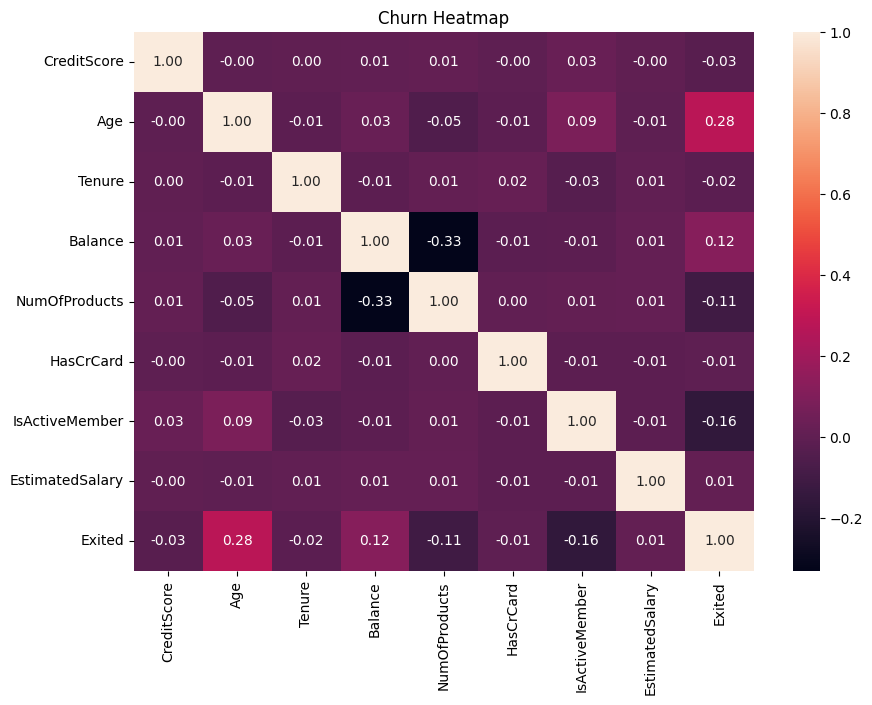

In [214]:
figure = plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(method="pearson",numeric_only=True),annot=True,fmt=".2f")
plt.title("Churn Heatmap")
plt.show()

Como comprobamos en el análisis bivariante mediante los scatterplots, no existe correlación significativa entre las variables siendo la variable que tiene una mayor correlación con la variable objetivo exited la edad, aunque muy débil.
<br>
<br>
<br>
As we found in the bivariate analysis using scatterplots, there is no significant correlation between the variables, being the variable that has a greater correlation with the target age, although very weak.

# EDA Findings - Conclusiones EDA


### ENGLISH:
We have a dataset in which we have clients with an average salary of 100,000 euros, and 75% accumulate below 149,388 euros. However, the data are dispersed, as the standard deviation is 57,510 euros. We see that our clients have the capacity to save, but depending on whether their salary is below or above the average salary, we appreciate that the balances are higher or lower than their salary. In general, clients are active in interaction with the bank and have a median number of products of 1, which in most cases is likely to be the credit card, as 70% of them have at least one. These clients, for the most part, are clients with the capacity to save, but there is a great dispersion in the balance variable, and although the average balance is 76,485 euros, this dispersion is 62,397 euros, having a large number of clients who have balances close to 0. On the other hand, most of them stay in the bank for at least 7 years in 75% of the clients and have an average stay of 5 years. These clients have an average age of 39 years and have a credit scoring of 650 points out of a maximum of 850, which confirms the previous appreciations. Regarding nationality, we have French clients at 50.14%, Spanish 24.77%, and German 25.09%. The majority are male, with a percentage of 54.57%. Of these, the nationality that remains the longest in the bank are the French at 42.64%, then the Spanish at 30.64%, and finally the Germans at 16.99%. If we look at the permanence by gender, we can see that men stay longer, with a percentage of 45.59%. Looking at the distribution of data divided by gender, we do not appreciate substantial differences between them beyond some slightly more pronounced in the following variable:

- Tenure: Here, there is a higher proportion of men with a longer tenure than women.
- Balance: Women have slightly lower savings than men—€96,147.55 compared to €98,064.97 for men.
- Salary: Women earn €101,905.34, while men earn €98,060.51 in median value.

Taking a look at the age distribution of those who leave or stay with the bank, we can see that the median age for those who leave is 45 years, while for those who stay, it’s 36 years. The 50% distribution falls between 38 and 51 years for those who leave and between 31 and 41 years for those who stay.

If we examine the number of products contracted, we notice that lower quantities, which become more pronounced from age 38 onwards, correspond to the bulk of the age distribution of those leaving the bank. Thus, clients with fewer products are more likely to leave the bank, aligning with the age range of 38 to 51. This trend may be due to clients in this age group either paying off their mortgages or seeking alternatives to bank products from other companies. Often, these additional products are bundled with loans to secure approval from risk departments and formalize the transaction. Over time, clients may explore better prices elsewhere and gradually cancel these additional products. In many cases, they cancel them because they are no longer useful and were only relevant during the loan approval process. In any case, this variable appears to be an early indicator of customer attrition.
In relation to whether clients are active in their relationship with the bank or not, we observe that those who are more active are less likely to leave the institution, and furthermore, those who have credit cards remain at the bank much longer than those who do not. The latter may be due to the fact that the credit card is a product of high engagement, so that if we look at the resulting balance of those clients who have left and those who stay based on whether they have a card or not, we can see that of those who do not have one, 17.19% have stayed, and of those who do, 42.07%. Related to the credit card, if we look at the data by gender, we appreciate that there is no difference between them since both women and men who have and do not have credit cards have similar proportions in terms of leaving or staying at the bank. Finally, looking at the relationships between all the variables, we see that in general they are not correlated. Of these correlations, we could highlight the one existing between the balance and the number of products with a value of -0.30, which means that as the balance increases, the number of products decreases. However, it is a weak relationship. On the other hand, if we look at the correlation between the variables with the target variable, the most notable correlations are:

    - Age has a correlation of 0.28, indicating that as age increases, the number of clients leaving the bank also tends to increase.
    - Balance has a correlation of 0.12, suggesting that as the balance increases, the likelihood of clients leaving the bank also rises.
    - Active membership shows a correlation of -0.16, indicating that more active clients tend to stay with the bank.
    - Number of products has a correlation of -0.11, meaning that clients with a higher number of products are less likely to leave the bank.

While these correlations make sense, their association with the target variable is too weak to use them as strong predictors for customer churn.

### SPANISH:
Tenemos un conjunto de datos en el cual tenemos clientes con un slario medio de 100.000, euros y el 75% se acumula por debajo de los 149.388 euros. Sin embargo, son datos dispersos, pues la desviación típica es de 57.510 euros.
Vemos que nuestros clientes tienen capacidad de ahorrar, pero dependiendo de si su salario está por debajo o por encima del salario medio, apreciamos que los balances son superiores o inferiores a su salario.
En general, los clientes son activos en la interacción con el banco y tienen un número mediano de productos de 1, el cual seguramente en la mayoría de los casos sea la tarjeta de crédito, pues el 70% de ellos tiene al menos una.
Estos clientes, en su mayoría, son clientes con capacidad de ahorro, pero existe  una gran dispersión en la variable balance y, aunque el balance medio es de 76.485 euros, esta dispersión es de 62.397 euros, teniendo un gran número de clientes que tienen balances cercanos a 0.
Por otra parte, la mayoría de ellos  se quedan en el banco al menos 7 años en el 75% de los clientes y tienen una permanencia media de 5 años. Estos clientes tienen una edad media de 39 años y tienen un scoring de crédito de 650 puntos sobre un máximo de 850, lo que confirma las apreciaciones anteirores.
En relación a la nacionalidad, tenemos clientes franceses en un 50,14%, españoles 24,77% y alemanes 25,09%. En su mayoría son del sexo masculino, siendo su porcentaje del 54,57%. De ellos, la nacionalidad que más permanece en el banco son los franceses en un 42,64% luego los españoles en un 30,64% y por último los alemanes con un 16,99%. Si miramos la permanencia por sexos podemos ver que son los hombres los que más permanecen, con un porcentaje de 45,59%.
Mirando la distribución de los datos dividido por sexos no apreciamos diferencias sustanciales entre ellos más allá de algunas algo má pronunciadas en las siguientes variable:

- tenure: aquí hay una mayor proporción de hombres con un rango superior en antiguedad que mujeres.
- balance: las mujeres tienen unos ahorros ligeramente inferiores al de los hombres 96.147,55 euros frente a 98.064,97 de las mujeres.
- salario: las mujeres ganan 101.905,34 euros frente a 98.060,51 euros de los hombres en valor mediano.

Echando un vistazo a la distribución por edades que dejan o permanencen en el banco, podemos ver que las personas que se van tienen una edad mediana de 45 años y las que se quedan de 36 años, estando el 50% de la distribución comprendida, para los que se van entre 38 y 51 años y para los que se quedan entre 31-41 años.
Si miramos la cantidad de productos contratados, podemos ver que menores cantidades de ellos, característica que se da a partir de los 38 años en adelante, se corresponde con el grueso de la distribución por edades que dejan el banco. De esta manera, aquellos clientes que tienen menos productos son más propensos a dejar el banco y coincide con el rango de de entre 38 y 51 años. Esto es posible que se deba a que a partir de esa edad algunos de los clientes dejarán de pagar la hipoteca o el préstamo que contrataron porque lo han finalizado o ,los que no, buscan alternativas a los productos de los bancos en otras compañías dado que muchas veces estos productos adicionales con los préstamos se contratan para obtener la aprobación por parte del departamento de riesgos y formalizar la operación. De esta manera, una vez que ya ha pasado un tiempo, estos clientes al considerar que pueden obtener precios mejores buscan alternativas y van cancelando productos. También en mucha ocasiones los cancelan porque no le son de utilidad y solo servían para el proceso de concesión del mismo. De cualquiera de las formas, esta variable parece ser un indicador temprano de salida de clientes.
En relación a si los clientes son activos en su relación con el banco o no apreciamos que aquellos que son más activos abandonan en menor proporcion la entidad y además aquellos que tienen tarjetas de crédito permanecen en el banco mucho más que aquellos que no la tienen. Esto último puede ser debido a que la tarjeta de crédito es un producto de alta vinculación, de tal manera que si miramos el saldo resultante de aquellos clientes que se han ido y los que se quedan en función de si tienen o no tarjeta, podemos ver que de los que no la tienen se han quedado el 17,19% y de los que la tienen el 42,07%. Relacionado con la tarjeta de crédito, si miramos los datos por sexo apreciamos que no existe diferencia entre ellos pues tanto las mujeres como los hombres que tienen y no tienen tarjeta de crédito tienen proporciones similares en la salida o estancia en el banco.
Al final, mirando las relaciones entre todas las variables vemos que de manera general no está correlacionadas. De estas correlaciones podríamos destacar la existente entre el balance y el número de productos con un valor de -0.30, por lo que a medida que el balance aumenta el número de productos disminuye. Sin embargo, es una relación débil. Por otra parte si miramos la correlación entre las variables con la variable objetivo, las correlaciones más destacables son:

    - la edad con un 0.28, a medida que la edad aumenta también aumentan los clientes que dejan el banco
    - el balance con un 0.12, de esta manera a medida que el balance aumenta también lo hace los clientes que dejan el banco
    - miembro activo con un -0.16, esta correlación nos indica que a medida que los clientes son más activos dejan menos el banco.
    - Número de productos con un -0.11, a medida que los clientes tienen un mayor número de productos se van menos del banco.
    
Aunque las correlaciones tienen sentido, tienen unos valores de asociación con la variable objetivo muy débiles para usarlos como predictores de la salida de un cliente del banco.

# Hypothesis Tests - Contrastes de Hipótesis

### ENGLISH
#### Is there any statistically significant difference in the age of clients who leave the bank compared to those who stay?
Null hypothesis: Clients who stay = Clients who leave Null hypothesis: Clients aged 38-51 = Other clients

#### They are statistically different based on the number of products they hold—clients who have left the bank versus those who haven’t.
Null hypothesis: Clients who haven’t left, based on the number of products = Clients who have left.

#### Active clients are equal to non-active clients.
Null hypothesis: Active clients = Non-active clients.

#### Clients with credit cards are equal to clients without credit cards.
Null hypothesis: Those with credit cards = Those without credit cards.

### SPANISH
#### Existe alguna diferencia estadísticamente significativa en la edad de los clientes que dejan el banco y los que no lo hacen
hipótesis nula --> los clientes que no se van = a  los clientes que se van
hipótesis nula --> los clientes entre 38-51 años = a los demás clientes

#### Son estadísticamente diferentes, según el número de productos que se tengan, los clientes que han dejado el banco de los que no lo han hecho
hipótesis nula --> los clientes que no se han ido según el número de productos = los clientes que se han ido

#### Los clientes que son activos son iguales a los que no son activos
hipótesis nula --> los clientes que son activos  = los clientes que no son activos

#### Los clientes con tarjeta de crédito son iguales a los cliente sin tarjeta de crédito
hipótesis nula --> los que tienen tarjeta = los que no tienen tarjeta de crédito

#### Exists any significant statistical difference in the client's age who leave the bank and who don't?
#### Existe alguna diferencia estadísticamente significativa en la edad de los clientes que dejan el banco y los que no lo hacen

Null hypothesis --> clients who don't leave = clients who leave  
hipótesis nula --> los clientes que no se van = a los clientes que se van

Here we are comparing two distributions between them:
En este caso estamos comparando dos distribuciones entre ellas:

In [215]:
edad_1 = df.loc[df.Exited == 1,"Age"]
edad_0 = df.loc[df.Exited == 0,"Age"]
tvalue,pvalue = stats.ttest_ind(a=edad_1,b=edad_0,equal_var=False)
if pvalue < 0.05:
    print(f"{pvalue} < 0.05 por lo tanto rechazamos la hipótesis nula")
    print(f"se van de media con: {edad_1.mean()} años y no se van de media con: {edad_0.mean()} años")
    print(f"ambas distribuciones son diferentes")
else:
    print(f"{pvalue} es > que 0.05 y por tanto aceptamos la hipótesis nula")
    print(f"se van de media con: {edad_1.mean()}años y no se van de media con: {edad_0.mean()} años")
    print(f"ambas distribuciones son estadísticamente iguales")

1.1456016293064251e-172 < 0.05 por lo tanto rechazamos la hipótesis nula
se van de media con: 44.812341932220534 años y no se van de media con: 37.40838879819164 años
ambas distribuciones son diferentes


Null hypothesis --> clientes between 38-51 yeas old = rest of the clients  
hipótesis nula --> los clientes entre 38-51 años = a los demás clientes

Here we are comparing a sample with the population (if we consider population our sample):
En este caso estamos comparando una muestra con la población (si consideramos a nuestra muestra la población):

In [216]:
edad_45 = df.loc[(df.Age >= 38) & (df.Age <= 51),"Age"]
popmean = df.Age.mean()
tvalue,pvalue = stats.ttest_1samp(a=edad_45,popmean=popmean)
if pvalue < 0.05:
    print(f"{pvalue} < 0.05 por lo tanto rechazamos la hipótesis nula")
    print(f"no es debido a la casualidad que los clientes comprendidos entre los 31-51 años acumulen el grueso de las salidas")
else:
    print(f"{pvalue} es > que 0.05 y por tanto aceptamos la hipótesis nula")
    print(f"puede ser debido a la casualidad que los clientes comprendidos entre los 31-51 años acumulen el grueso de las salidas")

0.0 < 0.05 por lo tanto rechazamos la hipótesis nula
no es debido a la casualidad que los clientes comprendidos entre los 31-51 años acumulen el grueso de las salidas


#### Statistically, the customers who have left the bank are different from those who have not, based on the number of products they hold.
#### Son estadísticamente diferentes, según el número de productos que se tengan, los clientes que han dejado el banco de los que no lo han hecho

Null hypothesis --> clients whow has not left based on the number of products = clients who has left  
hipótesis nula --> los clientes que no se han ido según el número de productos = los clientes que se han ido

> Note: number of products does not affect to churning. In this case we are comparing two sample distributions  
> Nota: es decir los productos no afectan a si los clientes se van o no se van del banco. En este caso estamos comparando dos distribuciones de la muestra:

In [217]:
np_crosstab_line = pd.crosstab(df.NumOfProducts,df.Exited,normalize=True)
np_crosstab_bar = pd.crosstab(df.Exited,df.NumOfProducts,normalize=True)

In [218]:
px.line(np_crosstab_line)

In [219]:
px.bar(np_crosstab_bar)


In our table, we observe that the majority of customers who leave have only one product, and as the number of products increases, fewer customers leave.
The line graph confirms this assertion. Additionally, we can see that among those who have not left, there are very few customers with three or four products, fewer than the number of customers who have left. This observation suggests that, for some reason, starting from three products, the customers who leave outnumber those who stay. We will test our hypothesis to ensure its accuracy

En nuestra tabla vemos como el grueso de los cientes que se van están en 1 producto y a medida que el número de productos crece se van yendo menos clientes.
En el gráfico de lineas podemos corroborar esta afirmación pero además podemos ver que de los que no se han ido, hay muy pocos clientes con 3 productos o 4 productos, menos que clientes que se han ido. Esto nos podría indicar que por alguna razón a partir de tres productos los clientes que se van son más de los que se quedan y por tanto vamos a contrastar nuestra hipótesis para tener certeza de que es así:

In [220]:
np_1 = df.loc[df.Exited == 1,"NumOfProducts"]
np_0 = df.loc[df.Exited == 0,"NumOfProducts"]
tvalue,pvalue = stats.ttest_ind(a=edad_1,b=edad_0,equal_var=False)

if pvalue < 0.05:
    print(f"{pvalue} < 0.05 por lo tanto rechazamos la hipótesis nula")
    print(f"por tanto podemos decir que la variable número de productos sí influye en que se vayan o no los clientes")
else:
    print(f"{pvalue} es > que 0.05 y por tanto aceptamos la hipótesis nula")
    print(f"por tanto la variable num of productos no influye en si se van o no los clientes")

1.1456016293064251e-172 < 0.05 por lo tanto rechazamos la hipótesis nula
por tanto podemos decir que la variable número de productos sí influye en que se vayan o no los clientes


#### clients with credit card are equal to clients without credit card
#### Los clientes con tarjeta de crédito son iguales a los cliente sin tarjeta de crédito

Null hypothesis --> clients with credit card = clients without credit card  
hipótesis nula --> los que tienen tarjeta = los que no tienen tarjeta de crédito

We are testing if the decision of leaving the bank is due to chance or not  
Es decir estamos comprobando si es debido a la casualidad que el tener tarjeta de crédito pueda influir en la decisión de dejar o no el banco.

In [221]:
cc_crosstab = pd.crosstab(df.Exited,df.HasCrCard)
px.bar(cc_crosstab)

Both among the customers who have left and those who have stayed, we observe that the majority of individuals had credit cards, while most of the customers who have stayed do not have credit cards. Therefore, is there any difference between the customers who have cards and those who do not?

Tanto de los clientes que se han ido como de los que no se han ido vemos que la mayoría de personas tenían tarjeta de crédito y que la mayoría de los clientes que se han quedado no tienen tarjeta de crédito. Por tanto, ¿existe alguna diferencia entre los clientes que tienen tarjeta y los que no la tienen?

In [222]:
stats.fisher_exact(pd.crosstab(df.HasCrCard,df.Exited))
if pvalue < 0.05:
    print(f"{pvalue} < 0.05 por lo tanto rechazamos la hipótesis nula")
    print(f"los clientes que tienen tarjeta no son iguales a los clientes que no tienen tarjeta")
else:
    print(f"{pvalue} es > que 0.05 y por tanto aceptamos la hipótesis nula")
    print(f"En este caso los clientes con tarjeta de crédito son iguales a los que no la tienen")

1.1456016293064251e-172 < 0.05 por lo tanto rechazamos la hipótesis nula
los clientes que tienen tarjeta no son iguales a los clientes que no tienen tarjeta


#### Active clients are equal to those who aren't
#### Los clientes que son activos son iguales a los que no son activos

Null Hypothesis --> Active clients = Not Active clients  
hipótesis nula --> los clientes que son activos  = los clientes que no son activos

In general we can see that active members leave the bank less than not active ones, but we must make sure that this hypothesis is not due to chance, to achieve that we perform the next hypothesis contrast:

En general podemos ver que si es un miebro activo se va menos que si no es un miembro activo, pero debemos comprobar si esta hipótesis se debe a la casualidad o no, para ello llevamos el siguiente contraste de hipótesis:

In [223]:
active_crosstab = pd.crosstab(df.Exited,df.IsActiveMember)
stats.fisher_exact(active_crosstab)
if pvalue < 0.05:
    print(f"{pvalue} < 0.05 por lo tanto rechazamos la hipótesis nula")
    print(f"por tanto que los clientes más activos se vayan en menor proporcion que los menos activos no es debido a la casualidad")
else:
    print(f"{pvalue} es > que 0.05 y por tanto aceptamos la hipótesis nula")
    print(f"En este caso que los clientes activos se vayan menos que los no activos es debido a la casualidad")

1.1456016293064251e-172 < 0.05 por lo tanto rechazamos la hipótesis nula
por tanto que los clientes más activos se vayan en menor proporcion que los menos activos no es debido a la casualidad


## Hypothesis Contrast Conclusions
## Conclusiones del contraste de Hipótesis

We have been able to see that all the hypothesis tests points towards the fact that the effect of the variables studied regarding to the decision of leaving the bank is not aleatory. Because of that, they have an influence in the decision of churning, althoug we can quantify how much. This so because there is a probability less than 5%, for a 95% interval of confidence, that due to chance we will encounter pvalues greater than 5% that leads to false negatives if we repet the experiment multiple times.

Hemos podido comprobar que todos los test de hipótesis realizados han mostrado que los efectos de las variables sobre la decisión de dejar el banco no son debidas a la casualidad. Es decir, podemos decir que tienen una influencia en la decisión, aunque no podemos cuantificarlo con estos tests. Esto es así debido a que existe una probabilidad inferior al 5%, para un intervalo de confianza del 95%, de que por casualidad nos encontremos con valores de pvalue superiores al 5% que nos hagan incurrir en falsos negativos si repetimos el experimento muchas veces.

## Which variable we would choose
## Qué variables escogeríamos

Regarding the correlation and the hypothesis test we will choose age, activity and product number variables. To these variables, we could add balance, because it is one of the variables with greatest correlation, and credit card because in the hypothesis test we have seen that exist a non aleatory difference between clients that have one and those who doesn't.

Por el análisis de correlación y el test de hipótesis cogeríamos las variables edad, actividad y número de productos. A estas añadiríamos la variable balance por estar dentro del grupo que tiene mayores correlaciones y a tarjeta de crédito por haber demostrado en el test de hipótesis que existe alguna diferencia no casual entre los clientes que tienen tarjeta y los que no la tienen.

# Machine Learning: Clasificación - Classification

We start by using Naive Bayes classier and SDGClassifier as the baseline and then we are going to try different classiers and compare  them with the baseline and between them. Para evaluar nuestro modelo de clasificación nos basaremos en:

- High Recall: We aim for a high recall so that we correctly identify most of the positives, even if our precision is low and therefore we have a high number of false positives. This situation can serve us to inquire about the customer’s needs and improve our contact and attention towards them.
- Precision-Recall Graph: As our positive class (True) is rare due to the imbalance of our classes, we will give more weight to the conclusions drawn from the Precision-Recall graph.
- Recall Objective: We set a goal of Recall > 0.8.

Para comenzar, utilizaremos el clasificador Naive Bayes y el SDGClassifier como línea base, y luego probaremos diferentes clasificadores para compararlos con la línea base y entre ellos. Para evaluar nuestro modelo de clasificación, nos basaremos en:

- Recall: Queremos un recall alto de manera que acertemos la mayoría de las positivos aunque nuestra precisión sea baja y por tanto tengamos un alto número de falsos positivos y nuestros comerciales tengan que hacer llamadas a personas que no están pensando en dejar el banco. Esta situación nos puede servir para interesarnos por las necesidades del cliente y mejorar nuestro contacto y atención hacia ellos.
- Como nuestra clase positiva (True) es rara, por el desbalanceo de clases, le vamos a otorgar un mayor peso a las conclusiones sacadas con el gráfico Precission-Recall
- Nos marcamos un objetivo de Recall > 0.8

In [224]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0       True            True        101348.88    True  
1      False            True        112542.58   False  
2       True           False        113931.57    True  
3      False           False         93826.63   False  
4       True            True         79084.10   False

In [225]:
import pandas as pd
X = df.drop(columns="Exited")
y = df["Exited"]
categorical_variables = ["Geography","Gender","HasCrCard","IsActiveMember"]
categorical_features = X[categorical_variables]

ml_df = OneHotEncoder()
ml_df.fit(categorical_features)
categorical_features_transformed = ml_df.transform(categorical_features)
categorical_features_transformed = pd.DataFrame(categorical_features_transformed.toarray(),columns=ml_df.get_feature_names_out())


In [226]:
categorical_features_transformed
vars_not_toInclude = ["Gender_Female","HasCrCard_False","IsActiveMember_False"]
categorical_features_transformed = categorical_features_transformed[[var for var in categorical_features_transformed.columns \
                                                                    if var not in vars_not_toInclude]]
categorical_features_transformed

Geography_France  Geography_Germany  Geography_Spain  Gender_Male  \
0                  1.0                0.0              0.0          0.0   
1                  0.0                0.0              1.0          0.0   
2                  1.0                0.0              0.0          0.0   
3                  1.0                0.0              0.0          0.0   
4                  0.0                0.0              1.0          0.0   
...                ...                ...              ...          ...   
9935               1.0                0.0              0.0          1.0   
9936               1.0                0.0              0.0          1.0   
9937               1.0                0.0              0.0          0.0   
9938               0.0                1.0              0.0          1.0   
9939               1.0                0.0              0.0          0.0   

      HasCrCard_True  IsActiveMember_True  
0                1.0                  1.0  
1                0.0                  1.0  
2                1.0                  0.0  
3                0.0                  0.0  
4                1.0                  1.0  
...              ...                  ...  
9935             1.0                  0.0  
9936             1.0                  1.0  
9937             0.0                  1.0  
9938             1.0                  0.0  
9939             1.0                  0.0  

[9940 rows x 6 columns]

In [227]:
labelE =LabelEncoder()
labelE.fit(y)
y=labelE.transform(y)
y = pd.Series(y,name="target")
y

0       1
1       0
2       1
3       0
4       0
       ..
9935    0
9936    0
9937    1
9938    1
9939    0
Name: target, Length: 9940, dtype: int64

In [228]:
rest_features = X[[var for var in X.columns if var not in categorical_variables]]
X = pd.concat([categorical_features_transformed, rest_features], axis=1)
X.head()

Geography_France  Geography_Germany  Geography_Spain  Gender_Male  \
0               1.0                0.0              0.0          0.0   
1               0.0                0.0              1.0          0.0   
2               1.0                0.0              0.0          0.0   
3               1.0                0.0              0.0          0.0   
4               0.0                0.0              1.0          0.0   

   HasCrCard_True  IsActiveMember_True  CreditScore  Age  Tenure    Balance  \
0             1.0                  1.0          619   42       2       0.00   
1             0.0                  1.0          608   41       1   83807.86   
2             1.0                  0.0          502   42       8  159660.80   
3             0.0                  0.0          699   39       1       0.00   
4             1.0                  1.0          850   43       2  125510.82   

   NumOfProducts  EstimatedSalary  
0              1        101348.88  
1              1        112542.58  
2              3        113931.57  
3              2         93826.63  
4              1         79084.10

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [230]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6958, 12)
(2982, 12)
(6958,)
(2982,)


## GaussianNB

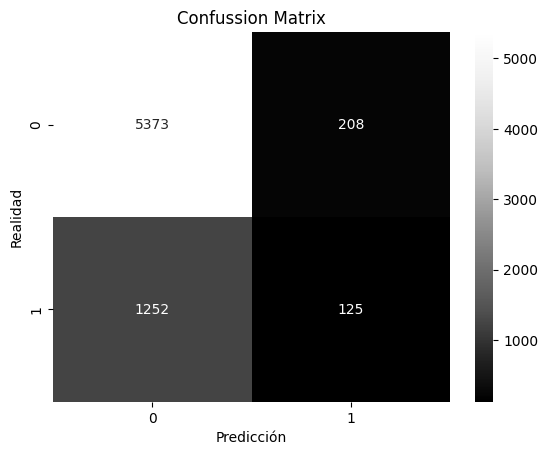

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5581
           1       0.38      0.09      0.15      1377

    accuracy                           0.79      6958
   macro avg       0.59      0.53      0.51      6958
weighted avg       0.72      0.79      0.74      6958



In [231]:
base_line = GaussianNB()
base_line.fit(X_train, y_train)

y_pred = cross_val_predict(base_line,X_train,y_train,cv=3)

new_classification_report(y_train, y_pred)


In one run we can see that using the basic naive bayes classifier there is a lot of room for improving when using all the variables. Even though, seen the correlation of the variables classifies well the false ones but very bad the true ones. It also should be said that:
- the number of Falses (people that has not churned) is much bigger thant the Trues (people that churn), 5581 vs 1377.
- the macro avg says that flipping a coing would be kind of the same of performing a classification with this estimator, but due to the highly unbalanced target the weighted average is more precise and says that the classifier does a fair job but it is a poor performance.

Let's assess the classifier using the precission-recall trade-off and precission vs recall graph and the ROC-AUC curve to get a better in depth analysis:

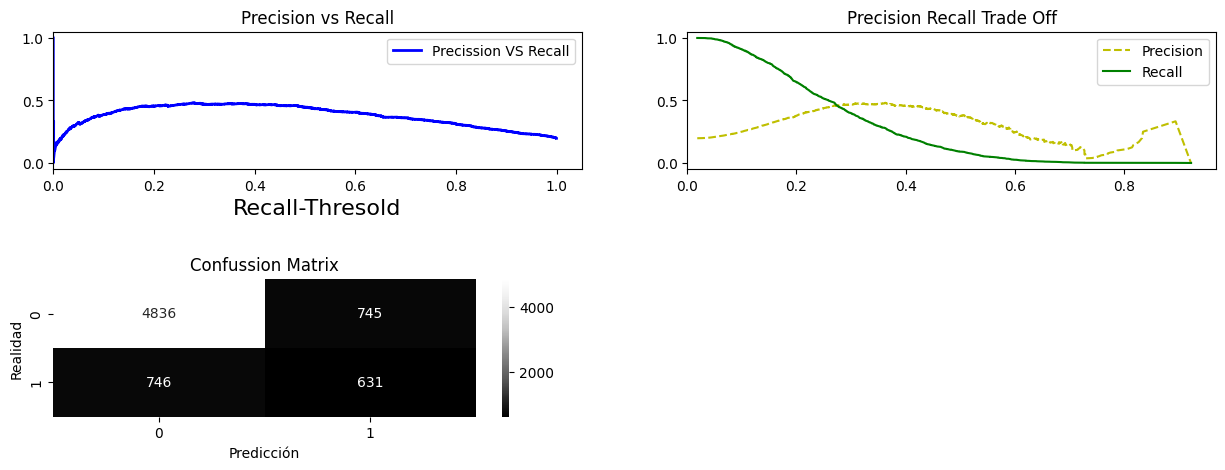

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5581
           1       0.46      0.46      0.46      1377

    accuracy                           0.79      6958
   macro avg       0.66      0.66      0.66      6958
weighted avg       0.79      0.79      0.79      6958



In [232]:
y_prob =  cross_val_predict(base_line,X_train,y_train,cv=3,method="predict_proba")
prob_for_positives = y_prob[:,1]
precisions, recalls, thresolds = precision_recall_curve(y_train, prob_for_positives)

Binary_classification_assessment(precisions, recalls, thresolds,prob_for_positives,y_train)

we have improved a bit the f1-score and a lot the recall for the class positive, but stil it is a poor performance

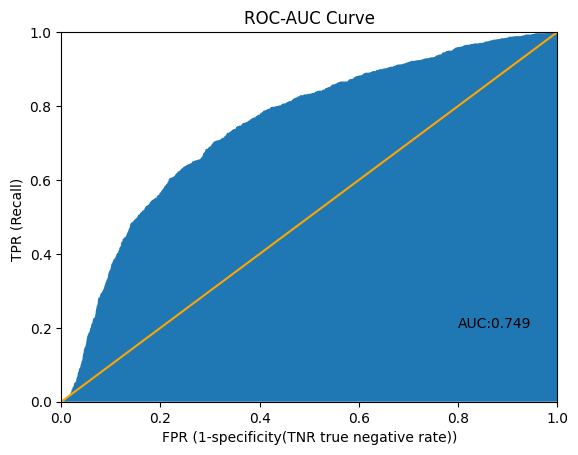

In [233]:
my_rocAuc(y_train,prob_for_positives)

The ROC Curve also can be improved with an area under the curve of 0.749

Let's see how it permorms in average running more samples using crossvalidation.

In [234]:
metrics = ["accuracy","precision_micro","recall_micro","f1_micro"]
cross_validation_report(GaussianNB(),X_train,y_train,StratifiedKFold(shuffle=True),metrics)

----------(Cross Validation Metrics Report)----------
GLOBAL VIEW:


  - accuracy_medio: 0.791 (+/- 0.005 std)
  - precision_micro_medio: 0.791 (+/- 0.005 std)
  - recall_micro_medio: 0.792 (+/- 0.006 std)
  - f1_micro_medio: 0.792 (+/- 0.005 std)


Now, let's see how it performs using only the features we consider more relevant  
Ahora vamos a ver como lo hace con solo las variables que hemos considerado más importantes para nosotros

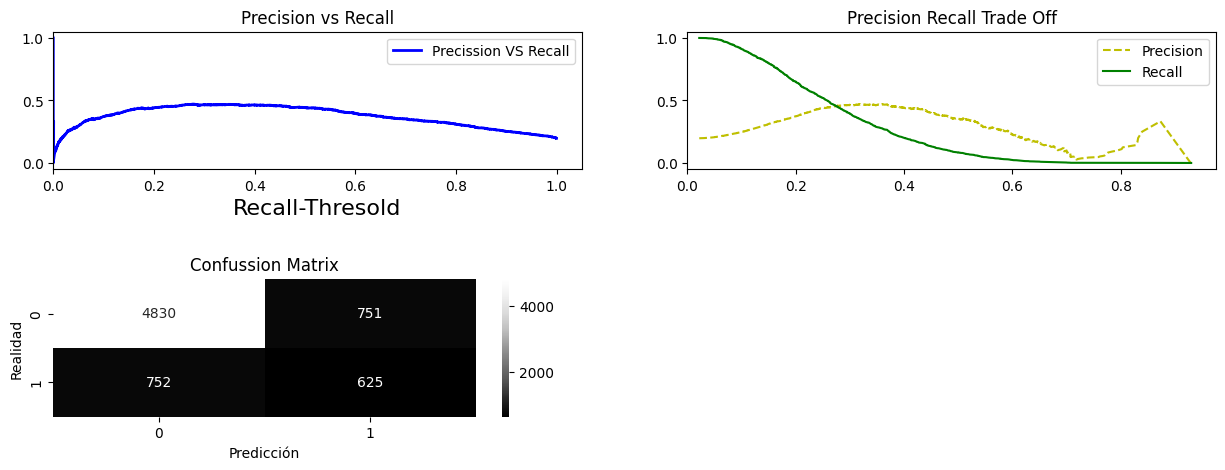

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5581
           1       0.45      0.45      0.45      1377

    accuracy                           0.78      6958
   macro avg       0.66      0.66      0.66      6958
weighted avg       0.78      0.78      0.78      6958



In [235]:
from sklearn.naive_bayes import GaussianNB
X_more_relevant = X[["Age","IsActiveMember_True","NumOfProducts","Balance","HasCrCard_True"]]

X_train, X_test, y_train, y_test = train_test_split(X_more_relevant, y, test_size=0.3, random_state=42)

base_line_more_relevant = GaussianNB()
base_line_more_relevant.fit(X_train, y_train)

y_pred = cross_val_predict(base_line_more_relevant,X_train,y_train,cv=3,method="predict_proba")
prob_for_positives = y_pred[:,1]
precisions,recalls,thresolds = precision_recall_curve(y_train,prob_for_positives)

Binary_classification_assessment(precisions, recalls, thresolds,prob_for_positives,y_train)

Everything remains kind of the same, a little worst, but we have been able to simplify the model. Let's see how it performs in average using 10 folds:  
Nos mantenemos igual que con todas las variables por lo que hemos podido simplificar al menos el modelo. Veamos como lo hace en media:

In [236]:
cross_validation_report(GaussianNB(),X_train,y_train,StratifiedKFold(shuffle=True),metrics)

----------(Cross Validation Metrics Report)----------
GLOBAL VIEW:
  - accuracy_medio: 0.789 (+/- 0.003 std)
  - precision_micro_medio: 0.79 (+/- 0.004 std)
  - recall_micro_medio: 0.788 (+/- 0.008 std)
  - f1_micro_medio: 0.79 (+/- 0.008 std)


Although standar deviation has decreased a bit the performance too.  
Aunque la desviación estándar se ha disminuido ligeramente también lo ha hecho el rendimiento.

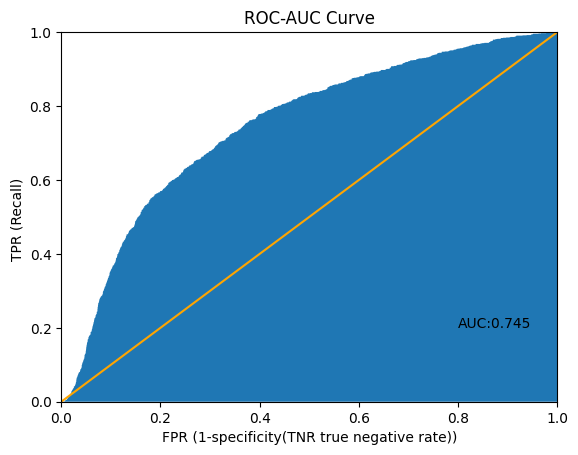

In [237]:
my_rocAuc(y_train,prob_for_positives)

Here again, the AUC has improved slightly but the reduce complexity is the greatest achievement of this model  while maintaining the performance.  
Aquí AUC ha aumentado algo, pero el gran logro de este modelo sería la reducción de complejidad manteniendo el rendimiento

BernoulliNB

As most of the features are binary we are going to try the BernoulliNB model  
Dado que en el modelo estamos usando una mayoria de variables que son binarias, vamos a probar el modelo BernoulliNB

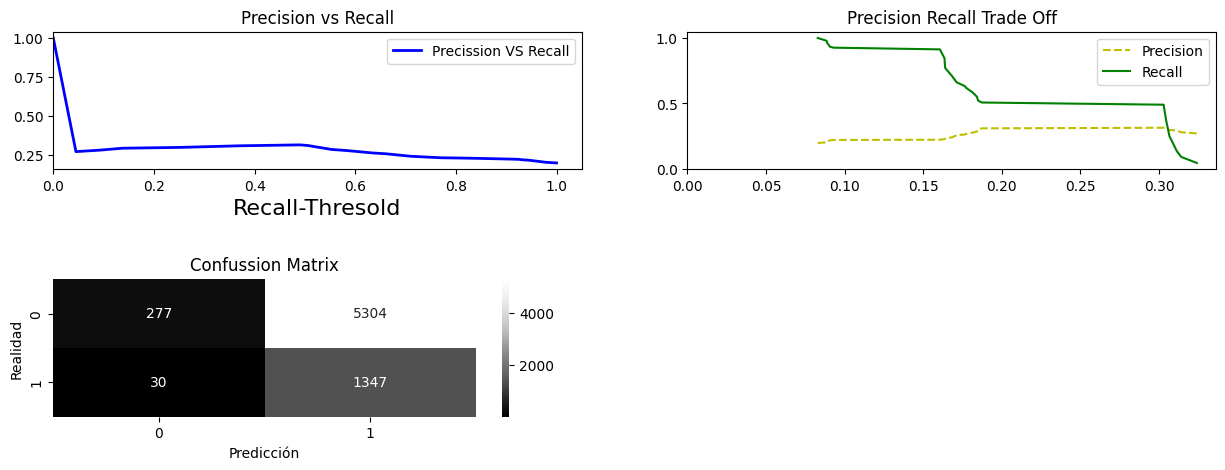

              precision    recall  f1-score   support

           0       0.90      0.05      0.09      5581
           1       0.20      0.98      0.34      1377

    accuracy                           0.23      6958
   macro avg       0.55      0.51      0.21      6958
weighted avg       0.76      0.23      0.14      6958



In [238]:
from sklearn.naive_bayes import BernoulliNB
sdg = BernoulliNB().fit(X_train,y_train)
y_pred = cross_val_predict(sdg,X_train,y_train,cv=3)
scores = cross_val_predict(sdg,X_train,y_train,cv=3,method="predict_proba")[:,1]
precisions,recalls,thresolds = precision_recall_curve(y_train,scores)
Binary_classification_assessment(precisions,recalls,thresolds,scores,y_train)

We see that the general metrics are much worst than before but in terms of recall for the class positive is much better. Of all the positives is able to classify correctly 1347 and fail in 30, giving a 98% recall.But the overall accuracy is very bad.
Vemos que las métricas generales son mucho peores que antes pero en términos de recall para la clase positiva son mucho mejores. De todos los positivos es capaz de clasificar correctamente  1347 y fallar en 30, el 98% de recall. Pero, de manera general, el modelo es muy malo.

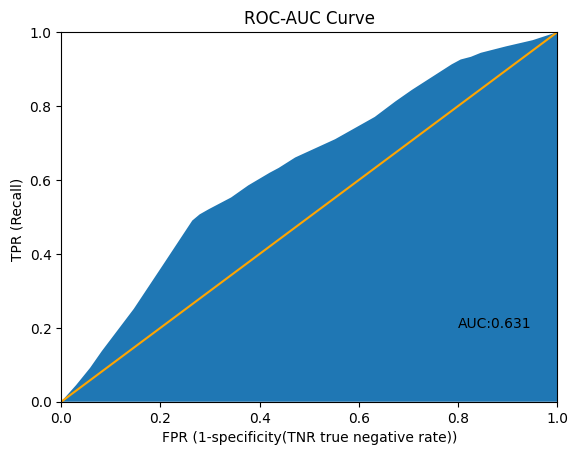

In [239]:
my_rocAuc(y_train,scores)

## MultinomialNB

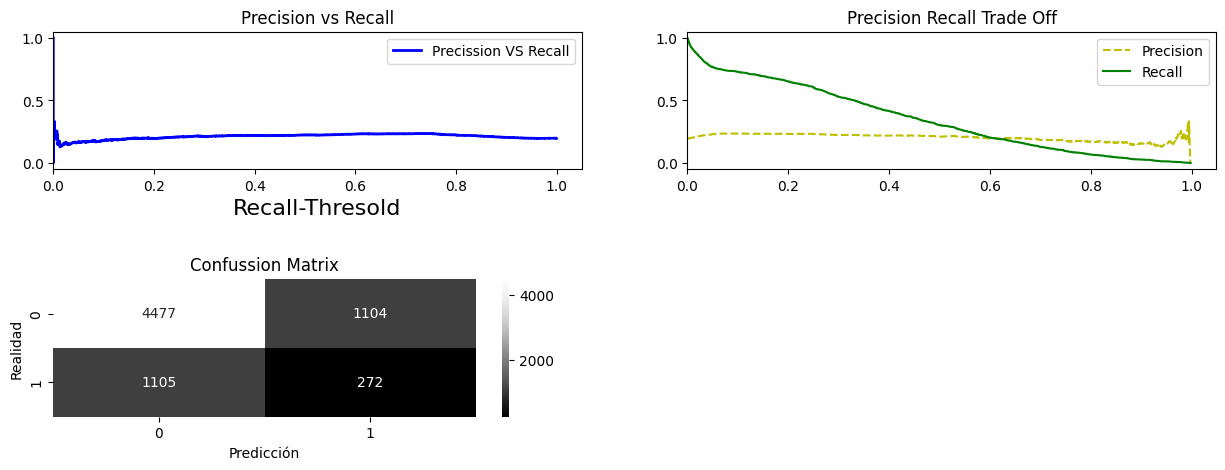

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5581
           1       0.20      0.20      0.20      1377

    accuracy                           0.68      6958
   macro avg       0.50      0.50      0.50      6958
weighted avg       0.68      0.68      0.68      6958



In [240]:
from sklearn.naive_bayes import MultinomialNB
sdg = MultinomialNB().fit(X_train,y_train)
y_pred = cross_val_predict(sdg,X_train,y_train,cv=3)
scores = cross_val_predict(sdg,X_train,y_train,cv=3,method="predict_proba")[:,1]
precisions,recalls,thresolds = precision_recall_curve(y_train,scores)
Binary_classification_assessment(precisions,recalls,thresolds,scores,y_train)

Vemos que usando multinomialNB obtenemos un recall muy bueno a la hora de predecir los falsos y un precision también muy buena. También el accuracy lo es, con un dato de 0.8 y una métrica weighted avg f1_score mejor que en los otros casos. Pero es debido a que solo predice los casos de la clase mayoritaria que son los falsos, la gente que no abandona el banco a y ninguna persona positiva, que es la gente que abandona el banco. Por lo que no resulta un modelo válido

## Clasificador mixto propio MultinomialNB-GaussianNB
Vamos a crear nuestro propio clasificador usando para las variables categóricas MultinomialNB y para las continuas GaussianNB. Luego vamos a combinar los resultados para obtener predicciones, para más tarde evaluar nuestro modelo.

In [241]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
import pandas as pd


def mixtureNB_model(df,y):

    for var in df.columns:
        if var in ["IsActiveMember_True","HasCrCard_True"]:
            df[var] = df[var].astype(bool)
        if var in ["Age","Balance"]:
            st_Age = StandardScaler().fit_transform(df[var].values.reshape(-1, 1))
            df[var] = st_Age

    X_train, X_test, y_train, y_test = train_test_split(df, y.values, test_size=0.2, random_state=0)

    X_discrete = X_train.select_dtypes(exclude="number")
    X_continuous = X_train.select_dtypes(include="number")

    nb_discrete = MultinomialNB().fit(X_discrete,y_train)
    nb_continuous = GaussianNB().fit(X_continuous,y_train)

    scores_discrete = cross_val_predict(nb_discrete,X_discrete,y_train,method="predict_proba",cv=3)
    scores_continuous = cross_val_predict(nb_continuous, X_continuous, y_train, method="predict_proba", cv=3)
    combined_scores = scores_discrete * scores_continuous
    combined_scores = combined_scores[:,1]


    precisions,recalls,thresolds = precision_recall_curve(y_train,combined_scores)
    Binary_classification_assessment(precisions,recalls,thresolds,combined_scores,y_train)

    my_rocAuc(y_train,combined_scores)

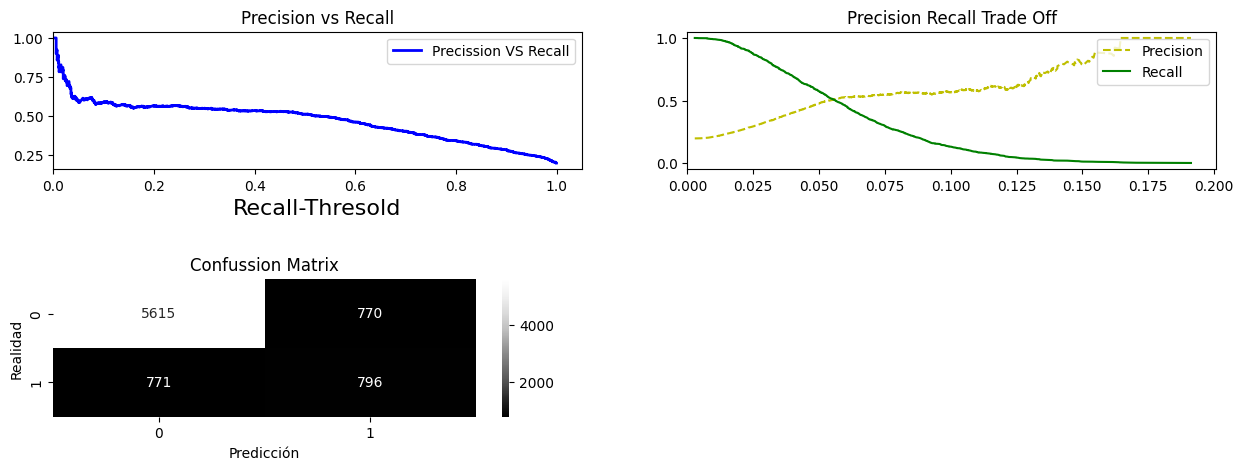

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6385
           1       0.51      0.51      0.51      1567

    accuracy                           0.81      7952
   macro avg       0.69      0.69      0.69      7952
weighted avg       0.81      0.81      0.81      7952



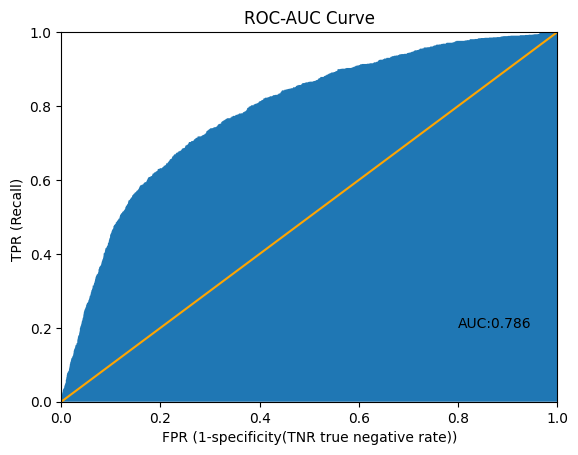

In [242]:
mixtureNB_model(X_more_relevant,y)

## Other Classifiers

In [243]:
classifiers_list = [DecisionTreeClassifier(),ExtraTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]

crossval_models(x=X_train,y=y_train,folds=StratifiedKFold(),estimadores=classifiers_list,score="recall")

A priori obtenemos un valor de recall mucho mayor que en los anteriores clasificadores lo que significa que podemos mejorarlos con mayores garantías. Aún así, veamos los datos para la precisión y para el f1-score

In [244]:
crossval_models(x=X_train,y=y_train,folds=StratifiedKFold(),estimadores=classifiers_list,score="precision")

In [245]:
crossval_models(x=X_train,y=y_train,folds=StratifiedKFold(),estimadores=classifiers_list,score="f1")

A priori, como nuestro objetivo es tener un buen dato de recall por encima de 0.8 nos enfocaremos en RandomForest ya que obtiene los mejores datos en Recall y un buen compromiso entre precission y recall dado por la métrica f1_score dado el sesgo de clases desbalanceadas que tenemos. No elegimos Gradient Boosting, porque nuestro foco está en recall y Gradient obtiene el mejor dato de f1_score debido que lo hace mucho mejor que el resto y que él mismo en la métrica recall.

==========DecisionTreeClassifier()==========


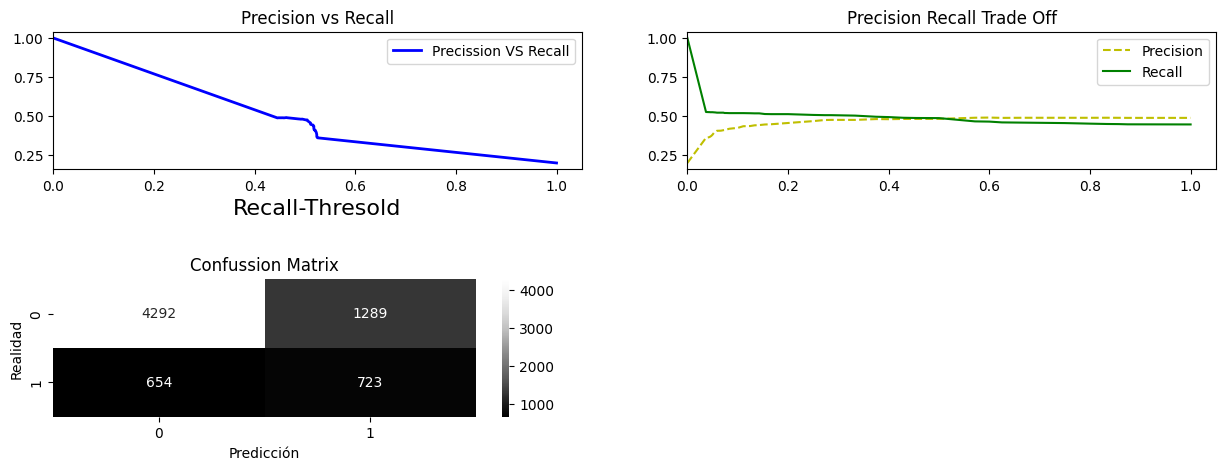

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      5581
           1       0.36      0.53      0.43      1377

    accuracy                           0.72      6958
   macro avg       0.61      0.65      0.62      6958
weighted avg       0.77      0.72      0.74      6958

==========ExtraTreeClassifier()==========


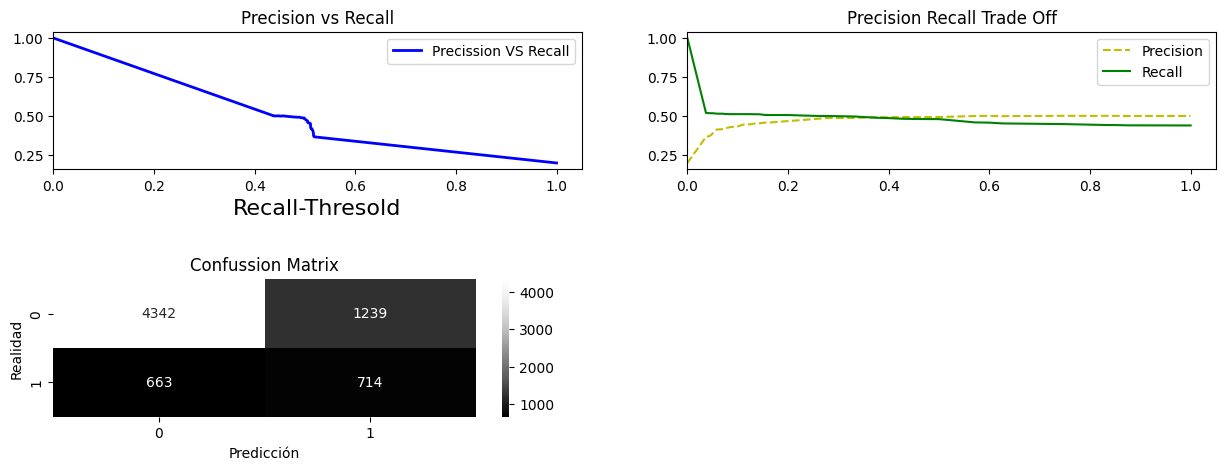

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      5581
           1       0.37      0.52      0.43      1377

    accuracy                           0.73      6958
   macro avg       0.62      0.65      0.62      6958
weighted avg       0.77      0.73      0.74      6958

==========RandomForestClassifier()==========


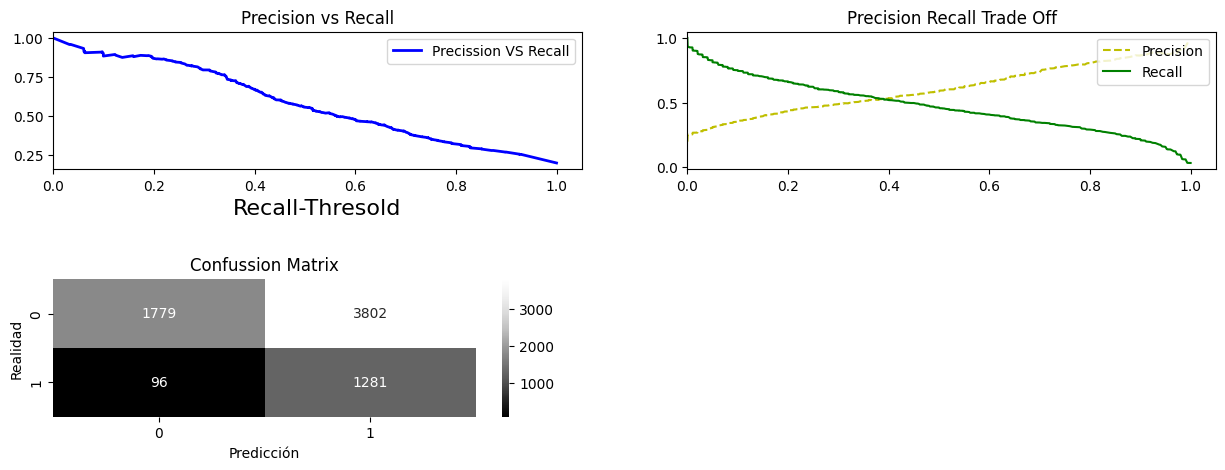

              precision    recall  f1-score   support

           0       0.95      0.32      0.48      5581
           1       0.25      0.93      0.40      1377

    accuracy                           0.44      6958
   macro avg       0.60      0.62      0.44      6958
weighted avg       0.81      0.44      0.46      6958

==========GradientBoostingClassifier()==========


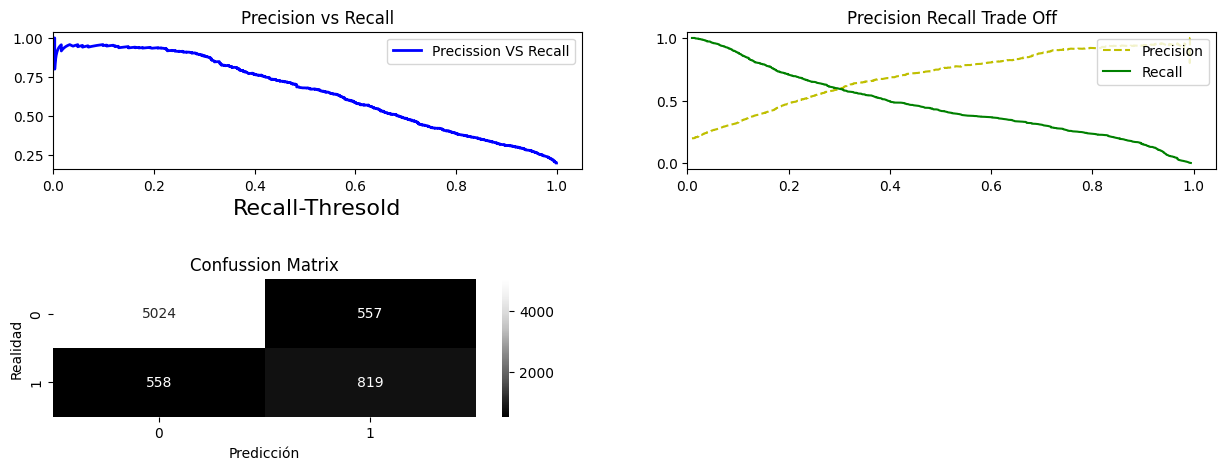

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5581
           1       0.60      0.59      0.59      1377

    accuracy                           0.84      6958
   macro avg       0.75      0.75      0.75      6958
weighted avg       0.84      0.84      0.84      6958



In [247]:
for classifier in classifiers_list:
  print("="*10 + str(classifier) + "="*10)
  cls = classifier.fit(X_train,y_train)
  y_pred = cross_val_predict(cls,X_train,y_train,cv=3)
  scores = cross_val_predict(cls,X_train,y_train,cv=3,method="predict_proba")[:,1]
  precisions,recalls,thresolds = precision_recall_curve(y_train,scores)
  Binary_classification_assessment(precisions,recalls,thresolds,scores,y_train)

Aunque el que mayor acierta, con un accuracy de 0.79 es GradientBoosting, el que mejor sirve a nuestros intereses como vimos al principio es Random Forest al tener un recall de 0.96 para la clase positiva (1) cumpliendo con el objetivo de estar por encima del 0.8 establecida al principio. Una vez decidido que vamos a usar RandomForest pasamos a tunear los hyperparámetros para hacerlo un clasificador más robusto

Again, the model in general terms is worst than GaussianNB when looking at the Roc-Auc curve as the Roc curve is closer to the middle line and the auc is lower.

De nuevo, el modelo en términos generales es peor que el GaussianNB cuando miramos a la curva Roc-Auc porque la urva Roc está más cercana a la línea media y el valor de auc es menor.

Aquí hay algunas estrategias que podrías considerar para mejorar el rendimiento de tu modelo en la clase minoritaria:

Recolectar más datos: Si es posible, obtener más ejemplos de la clase minoritaria puede ayudar a equilibrar el conjunto de datos y mejorar el rendimiento del modelo.
Rebalanceo de clases: Utilizar técnicas como el sobremuestreo de la clase minoritaria o el submuestreo de la clase mayoritaria.
Modificar el peso de las clases: Dar más peso a la clase minoritaria durante el entrenamiento del modelo.
Utilizar métricas adecuadas: Considerar métricas como la curva ROC-AUC o la curva de Precisión-Recall, que pueden dar una mejor idea del rendimiento del modelo en conjuntos de datos desbalanceados.
Probar otros modelos: Algunos modelos pueden manejar mejor los datos desbalanceados. Podrías experimentar con modelos como Random Forest o XGBoost, que tienen parámetros para manejar clases desbalanceadas.